# Phase 3 : EDA of IMDB data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the first csv file
df1 = pd.read_csv('movie_data1.csv')

In [3]:
df1

,Sno,Movie Name,Director1 Name,Director2 Name,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,Christopher Nolan,NaN,152 min,(2008),9.0,84.0
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,201 min,(2003),9.0,94.0
2,3,Inception,Christopher Nolan,NaN,148 min,(2010),8.8,74.0
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,178 min,(2001),8.8,92.0
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NaN,179 min,(2002),8.8,87.0
...,...,...,...,...,...,...,...,...
1745,"1,746",Radhe,Prabhu Deva,NaN,109 min,(2021),1.9,NaN
1746,"1,747",Race 3,Remo D'Souza,NaN,160 min,(2018),1.9,NaN
1747,"1,748",Angels Apocalypse,Sean Cain,NaN,85 min,(2015),1.7,NaN
1748,"1,749",The Cost of Deception,Keith English,NaN,125 min,(2021),1.5,NaN


In [4]:
# checking data types of columns
df1.dtypes

Sno                object
Movie Name         object
Director1 Name     object
Director2 Name     object
Duration           object
Year               object
Ratings           float64
Metascore         float64
dtype: object

In [5]:
# Here we can see the serial number column contains object data type but it contains numeric data type so we need to convert it
# it also contains comma in between so we need to replace them
df1['Sno'] = df1['Sno'].str.replace(',', '')

In [6]:
# now we will convert the data type of column Sno
df1['Sno'] = df1['Sno'].astype('int')

In [7]:
# in the dataframe we can see the column duration contains data like 152 min, 201 min but we want to show it like 152, 201 only 
# so we need to extract the unnecessary data from this

# column duration also showing object data type but it has numeric data type so we will also convert that
df1['Duration'] = df1['Duration'].str.extract('(\d+)').astype('int')

In [8]:
# column year is also showing object data type but it needs to be year datatype
# this column also contain some extra data along with brackets which we don't need so we will extract all unnecessary data and
# replace the brackets with blank space
df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '').str.extract(r'(\d+)').astype('int')

C:\Users\sonus\AppData\Local\Temp\ipykernel_6120\95715490.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Year'] = df1['Year'].str.replace(r'[\(\)]', '').str.extract(r'(\d+)').astype('int')


In [9]:
df1

,Sno,Movie Name,Director1 Name,Director2 Name,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,Christopher Nolan,NaN,152,2008,9.0,84.0
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,201,2003,9.0,94.0
2,3,Inception,Christopher Nolan,NaN,148,2010,8.8,74.0
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,178,2001,8.8,92.0
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NaN,179,2002,8.8,87.0
...,...,...,...,...,...,...,...,...
1745,1746,Radhe,Prabhu Deva,NaN,109,2021,1.9,NaN
1746,1747,Race 3,Remo D'Souza,NaN,160,2018,1.9,NaN
1747,1748,Angels Apocalypse,Sean Cain,NaN,85,2015,1.7,NaN
1748,1749,The Cost of Deception,Keith English,NaN,125,2021,1.5,NaN


*Here we can see the unnecessary data are removed from both columns.*

In [10]:
# let's check data types of columns
df1.dtypes

Sno                 int32
Movie Name         object
Director1 Name     object
Director2 Name     object
Duration            int32
Year                int32
Ratings           float64
Metascore         float64
dtype: object

*Here we can see all the columns now showing correct data types.*

In [11]:
# loading 2nd dataframe
df2 = pd.read_csv('movie_data2.csv')
df2

,Movie Name,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"2,718,202",Action,Crime,Drama,"$1,006,234,167",117,PG-13
1,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"1,887,073",Action,Adventure,Drama,"$1,147,633,833",407,PG-13
2,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,"2,412,987",Action,Adventure,Sci-Fi,"$870,110,523",103,PG-13
3,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,"1,915,738",Action,Adventure,Drama,2.39 : 1,184,PG-13
4,The Lord of the Rings: The Two Towers,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,"1,703,276",Action,Adventure,Drama,"$947,944,270",788,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,"178,806",Action,Crime,Thriller,2.35 : 1,NaN,TV-MA
1746,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,"47,587",Action,Crime,Thriller,NaN,NaN,Not Rated
1747,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,"42,912",Action,Fantasy,Sci-Fi,NaN,NaN,NaN
1748,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,"39,453",Action,Crime,Drama,NaN,NaN,NaN


In [12]:
# let's check the data types of columns
df2.dtypes

Movie Name          object
Star1               object
Star2               object
Star3               object
Star4               object
Votes               object
Genre1              object
Genre2              object
Genre3              object
Gross Collection    object
Popularity          object
Certification       object
dtype: object

*Here we can see columns Votes, Gross Collection and Popularity is showing object data type but in the dataframe we can see that it contains numeric data type so we need to change the data types of the columns.*

In [13]:
# Votes column contains comma values and we have to remove them to make our data clean
df2['Votes'] = df2['Votes'].str.replace(',', '')  # replacing commas
df2['Votes'] = pd.to_numeric(df2['Votes'], errors = 'coerce')   # converting column into numeric data type and handling error

In [14]:
# column gross collection contains $ sign we need to replace them and it contains some unnecessary data also so we will handle 
# them
df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')   # replacing dollar sign
df2['Gross Collection'] = pd.to_numeric(df2['Gross Collection'], errors = 'coerce')
# converting data type to numeric and handling errors it will also replace the unnecessary data with nan values

C:\Users\sonus\AppData\Local\Temp\ipykernel_6120\3572583974.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Gross Collection'] = df2['Gross Collection'].str.replace(r'[\$,]', '')   # replacing dollar sign


In [15]:
# converting popularity column to numeric data type and handling errors
df2['Popularity'] = pd.to_numeric(df2['Popularity'], errors = 'coerce')

In [16]:
# checking data types
df2.dtypes

Movie Name           object
Star1                object
Star2                object
Star3                object
Star4                object
Votes                 int64
Genre1               object
Genre2               object
Genre3               object
Gross Collection    float64
Popularity          float64
Certification        object
dtype: object

*The data types of all columns are corrected.*

In [17]:
# merging two dataframes
df = pd.merge(df1, df2, on = 'Movie Name', how = 'inner')
df

,Sno,Movie Name,Director1 Name,Director2 Name,Duration,Year,Ratings,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross Collection,Popularity,Certification
0,1,The Dark Knight,Christopher Nolan,NaN,152,2008,9.0,84.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2718202,Action,Crime,Drama,1.006234e+09,117.0,PG-13
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,201,2003,9.0,94.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1887073,Action,Adventure,Drama,1.147634e+09,407.0,PG-13
2,3,Inception,Christopher Nolan,NaN,148,2010,8.8,74.0,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2412987,Action,Adventure,Sci-Fi,8.701105e+08,103.0,PG-13
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,178,2001,8.8,92.0,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1915738,Action,Adventure,Drama,NaN,184.0,PG-13
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NaN,179,2002,8.8,87.0,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1703276,Action,Adventure,Drama,9.479443e+08,788.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,1746,Radhe,Prabhu Deva,NaN,109,2021,1.9,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,178806,Action,Crime,Thriller,NaN,NaN,TV-MA
1814,1747,Race 3,Remo D'Souza,NaN,160,2018,1.9,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,47587,Action,Crime,Thriller,NaN,NaN,Not Rated
1815,1748,Angels Apocalypse,Sean Cain,NaN,85,2015,1.7,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,42912,Action,Fantasy,Sci-Fi,NaN,NaN,NaN
1816,1749,The Cost of Deception,Keith English,NaN,125,2021,1.5,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,39453,Action,Crime,Drama,NaN,NaN,NaN


# EDA : Exploratory Data Analysis

As we have merged the two dataframes now we will do analysis of data and try to find insights from the data.

In [18]:
# First let's check the shape of dataframe
df.shape

(1818, 19)

*It has 1818 rows and 19 columns.*

In [19]:
# let's chek the data types of all columns
df.dtypes

Sno                   int32
Movie Name           object
Director1 Name       object
Director2 Name       object
Duration              int32
Year                  int32
Ratings             float64
Metascore           float64
Star1                object
Star2                object
Star3                object
Star4                object
Votes                 int64
Genre1               object
Genre2               object
Genre3               object
Gross Collection    float64
Popularity          float64
Certification        object
dtype: object

*Some column contains object data type and some contains numeric data type.*

In [20]:
# checkin for null values
df.isnull().sum()

Sno                    0
Movie Name             0
Director1 Name         0
Director2 Name      1717
Duration               0
Year                   0
Ratings                0
Metascore            188
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Votes                  0
Genre1                 0
Genre2                 2
Genre3               147
Gross Collection    1544
Popularity          1510
Certification         31
dtype: int64

*Here we can see there are few columns which contains some null values and few columns which contains too much null values that is more than 80% of total data.*

In [21]:
# let's check statistical summary of numeric column
df.describe()

,Sno,Duration,Year,Ratings,Metascore,Votes,Gross Collection,Popularity
count,1818.000000,1818.000000,1818.000000,1818.000000,1630.000000,1.818000e+03,2.740000e+02,308.000000
mean,878.916392,115.213971,2005.964796,6.472387,53.214110,1.806981e+05,3.682571e+08,495.944805
std,506.101353,21.569738,13.336006,0.996188,16.269679,2.353113e+05,4.360077e+08,296.094668
min,1.000000,45.000000,1924.000000,1.200000,9.000000,2.501800e+04,3.462580e+05,2.000000
25%,440.250000,100.000000,2000.000000,5.900000,41.000000,4.736400e+04,8.784335e+07,242.750000
50%,881.500000,111.000000,2009.000000,6.500000,53.000000,9.664250e+04,2.175476e+08,467.000000
75%,1318.750000,126.000000,2016.000000,7.100000,65.000000,2.137355e+05,4.568723e+08,772.500000
max,1750.000000,321.000000,2023.000000,9.000000,98.000000,2.718202e+06,2.923706e+09,994.000000


Observations:
    
    1: In some columns mean is little bit greater than median that means the data can be skewed.
        
    2: The standard deviation of most columns are high but the standard deviation of popularity column is very high.
        
    3: The shortest runtime of movie is of 45 mins and longest runtime is 321 mins.
        
    4: The average rating of movies is 6.4.
        
    5: The maximum popularity rating of a movie is 994.

In [22]:
# let's check statistical summary of object column
df.describe(include = 'O')

,Movie Name,Director1 Name,Director2 Name,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,Certification
count,1818,1818,101,1818,1817,1817,1816,1818,1816,1671,1787
unique,1716,928,78,723,1163,1327,1444,2,15,18,14
top,The Magnificent Seven,Michael Bay,Lilly Wachowski,Sylvester Stallone,Samuel L. Jackson,Morgan Freeman,Vincent D'Onofrio,Action,Adventure,Drama,R
freq,4,15,5,27,14,8,6,1748,669,345,726


Observations:
    
    1: The most parts were made of movie The Magnificent Seven that is 4.
        
    2: There are total 928 different directors from which Michael Bay has directed most of the movies that are listed here.
        
    3: Sylvester Stallone is the star who appeared in most of the movies that are listed here.
        
    4: Most of the movies are of Action genre.
        
    5: Most of the movies have R certification.
    
    6: Here we can also see the number of unique values present in all columns.

## Data visualization

In [23]:
# let's check the distribution of numerical data
# first we will make a list of all numeric columns
# we will use list concatenation to make the list

num = [i for i in df.columns if df[i].dtypes != 'O']

In [24]:
# importing warnings to ignore unnecesary warnings
import warnings
warnings.filterwarnings('ignore')

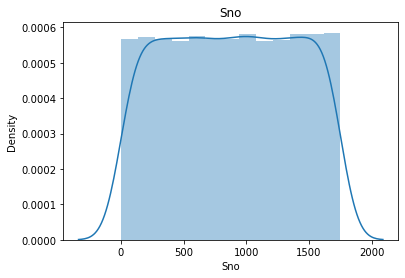

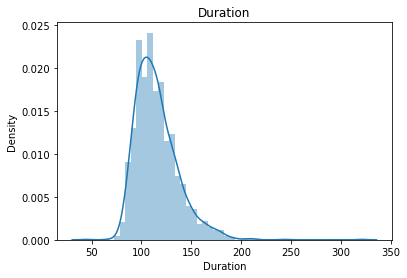

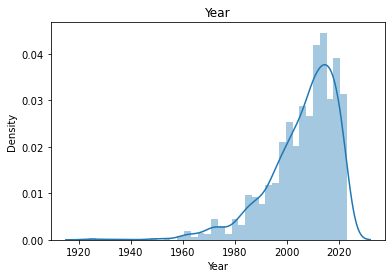

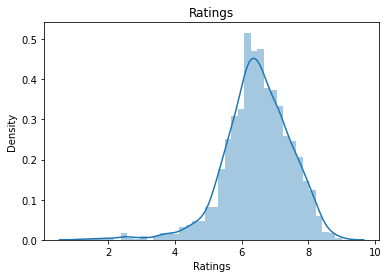

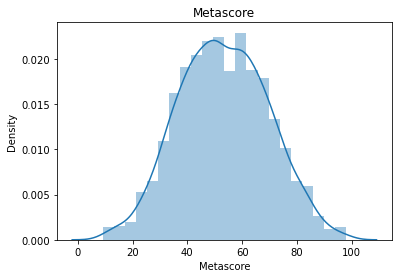

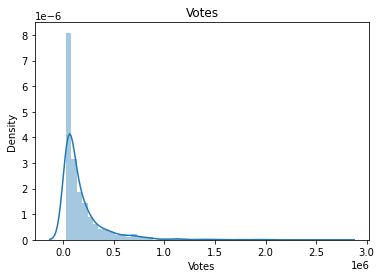

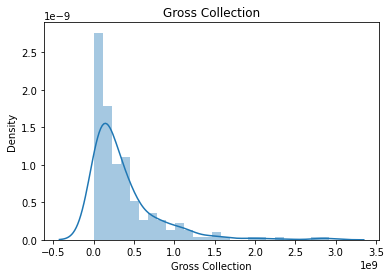

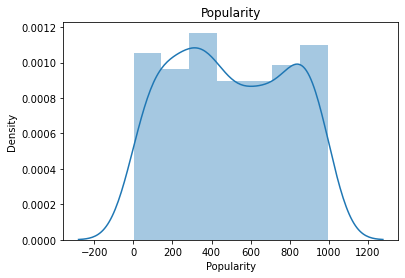

In [25]:
# Now let's check the distribution of data we will use for loop for that
for i in num:
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

Observations:
    
    1: Most of the movies were of duration between 100 to 130 mins.
        
    2: The number of movies made in recent years i.e after 2010 are very high as compare to number of movies made before 
    2010.
        
    3: Most of the movies are rated between 6 to 7.
        
    4: Metascore of movies are normally distributed.
        
    5: Votes and Gross Collection of movies are right skewed that means very few movies which are voted by more number of     peoples and very few movies have done a very high number of gross collection.

In [26]:
# now let's visualize the object data
# first we will make a list of all object data type columns
# we will use list concatenation for that

obj = [i for i in df.columns if df[i].dtypes == 'O']

In [27]:
obj

['Movie Name',
 'Director1 Name',
 'Director2 Name',
 'Star1',
 'Star2',
 'Star3',
 'Star4',
 'Genre1',
 'Genre2',
 'Genre3',
 'Certification']

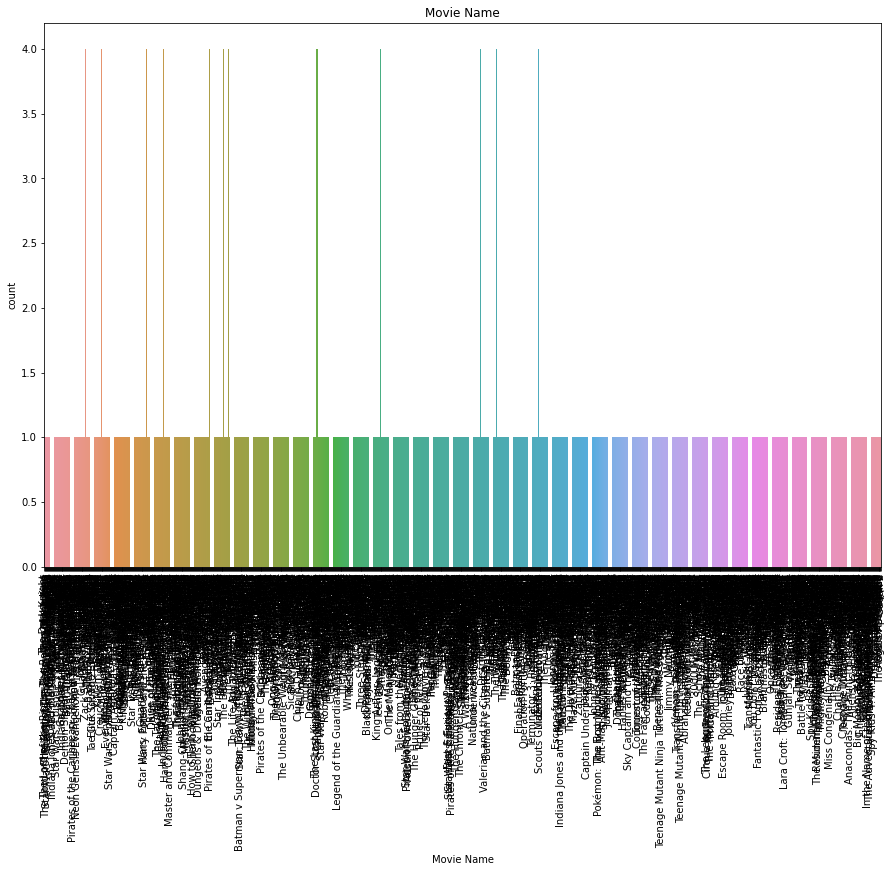

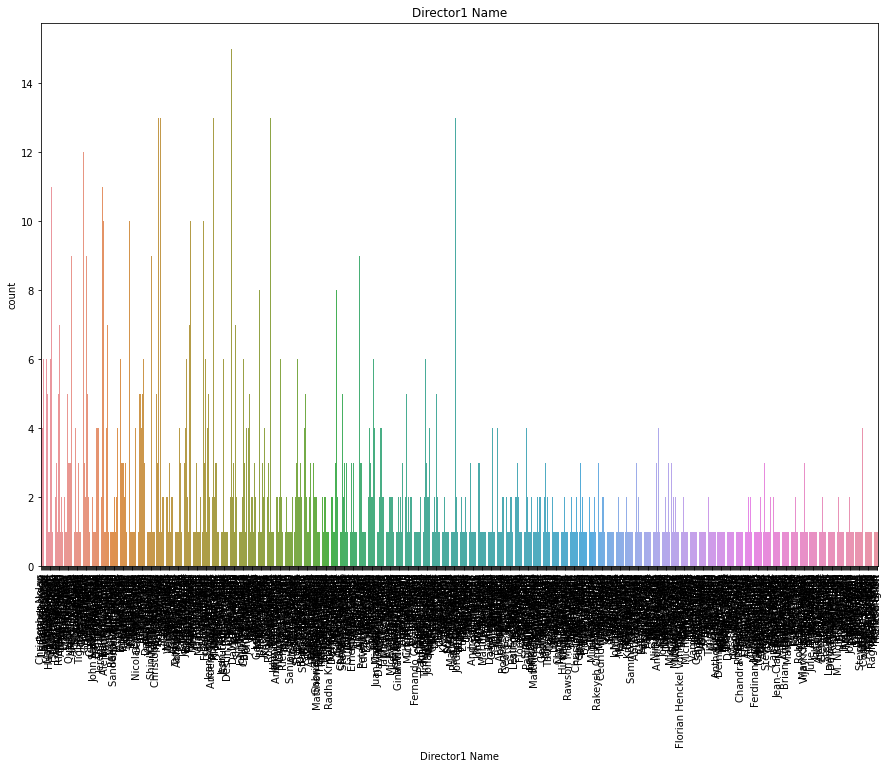

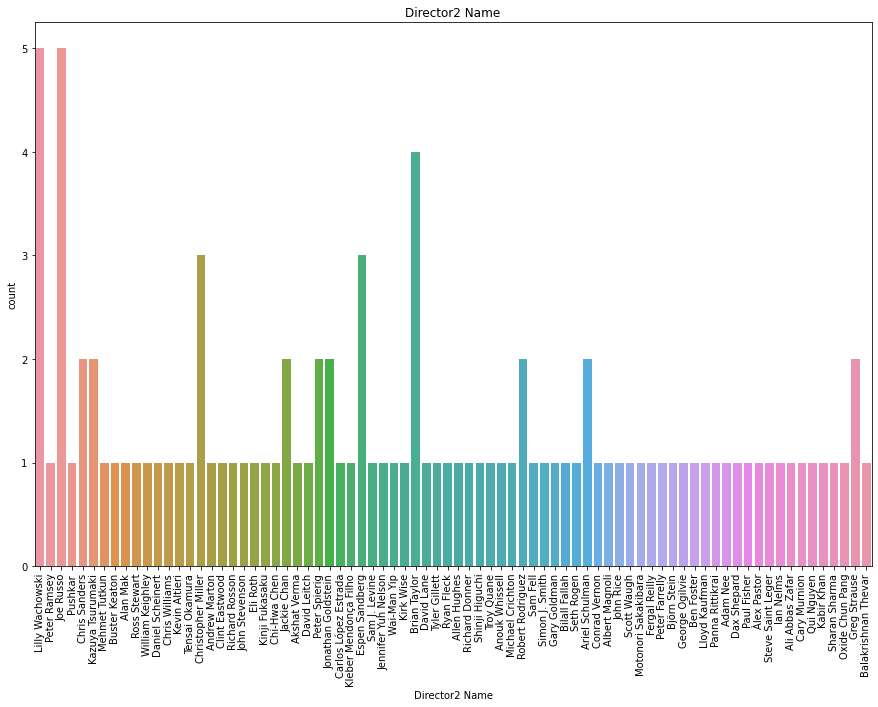

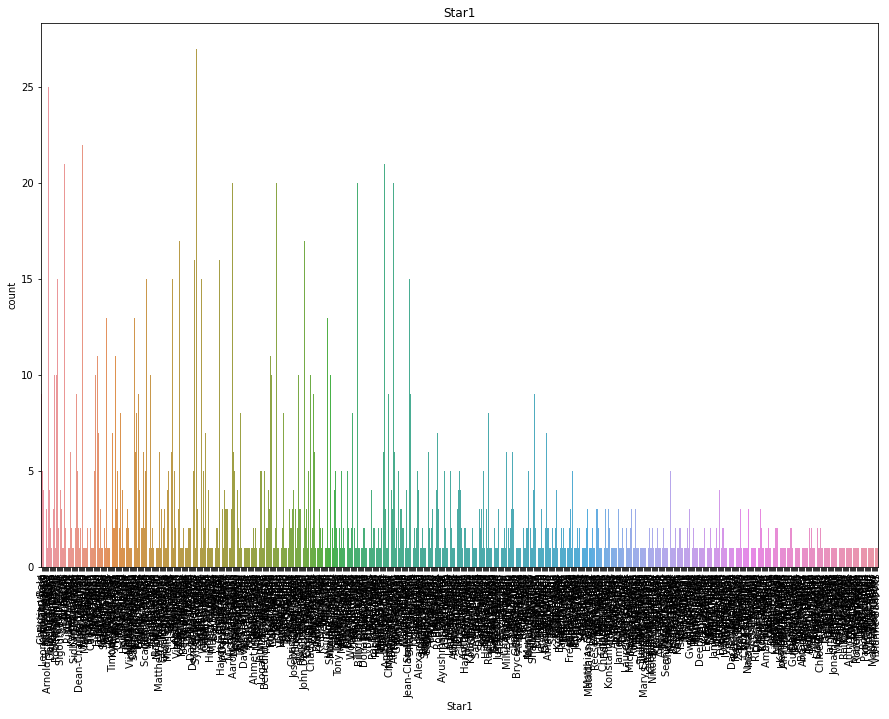

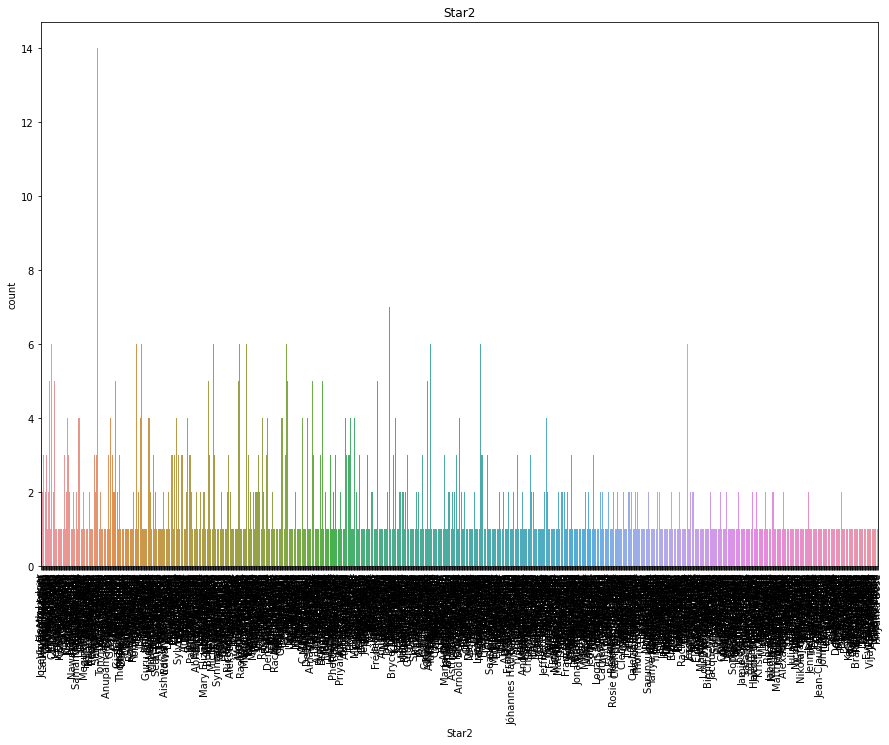

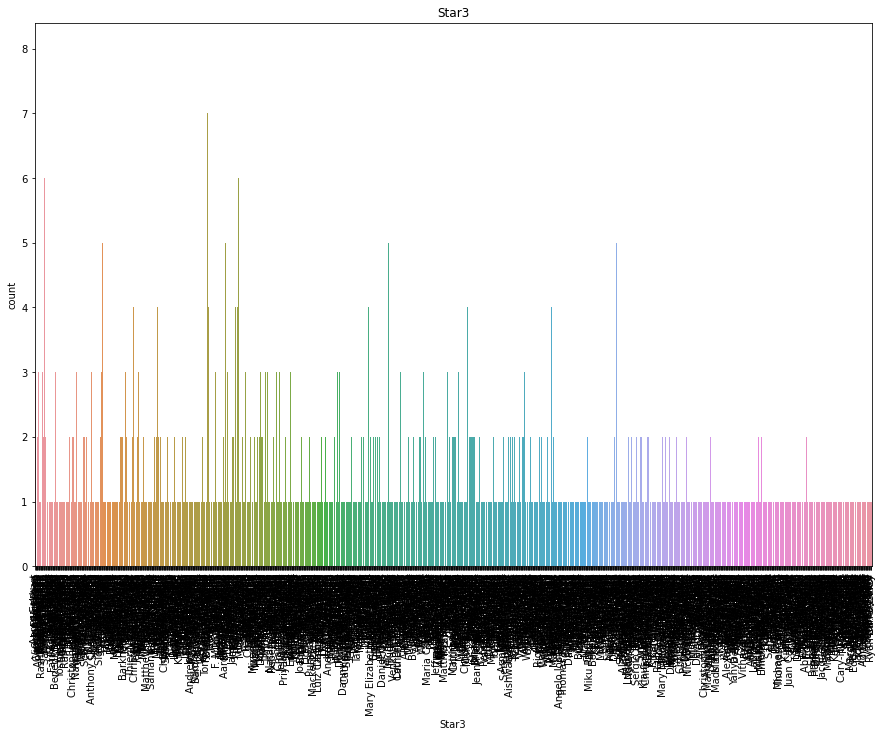

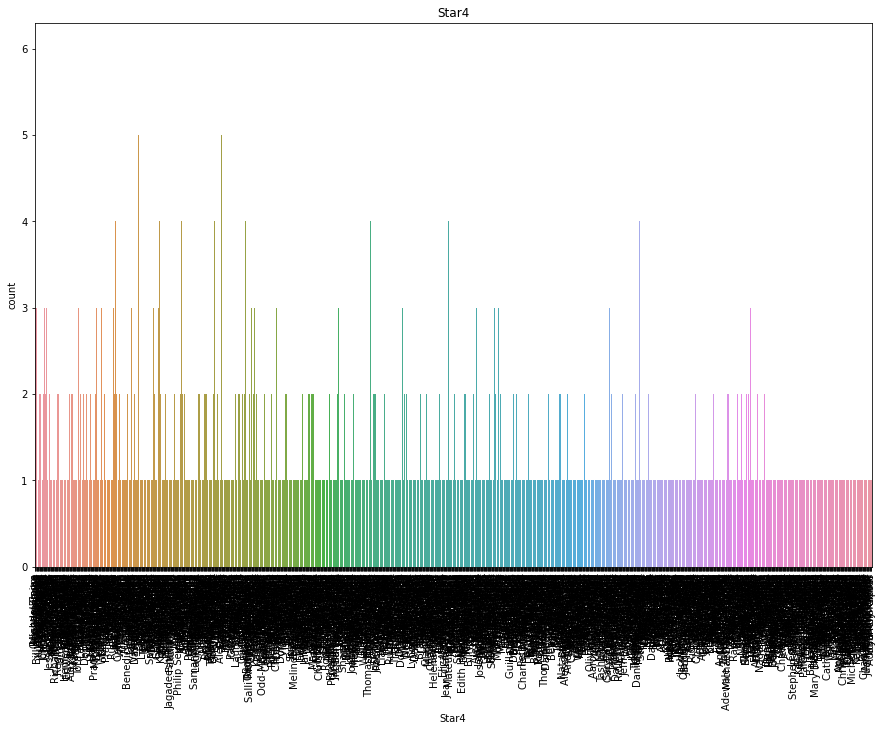

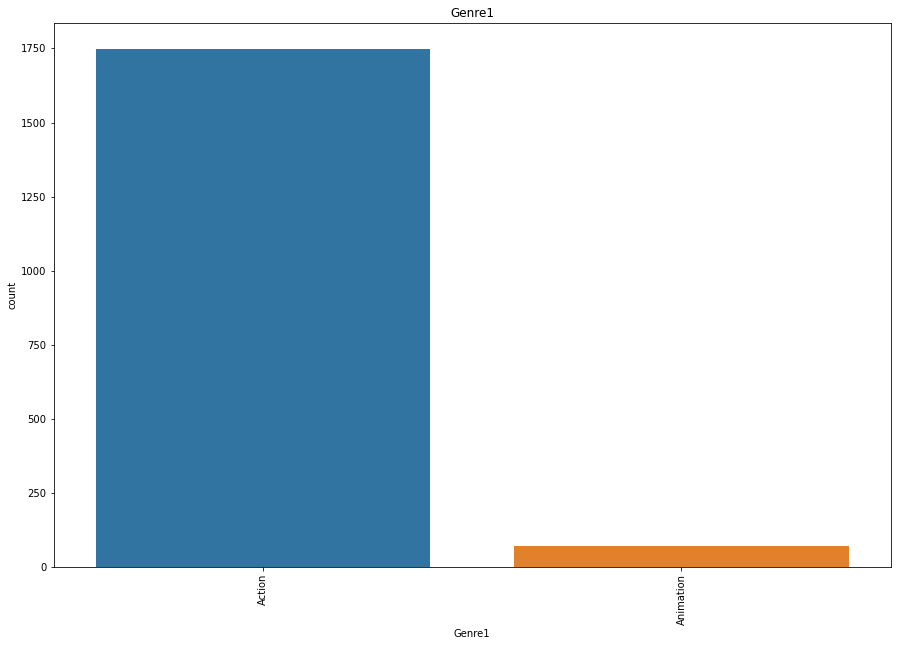

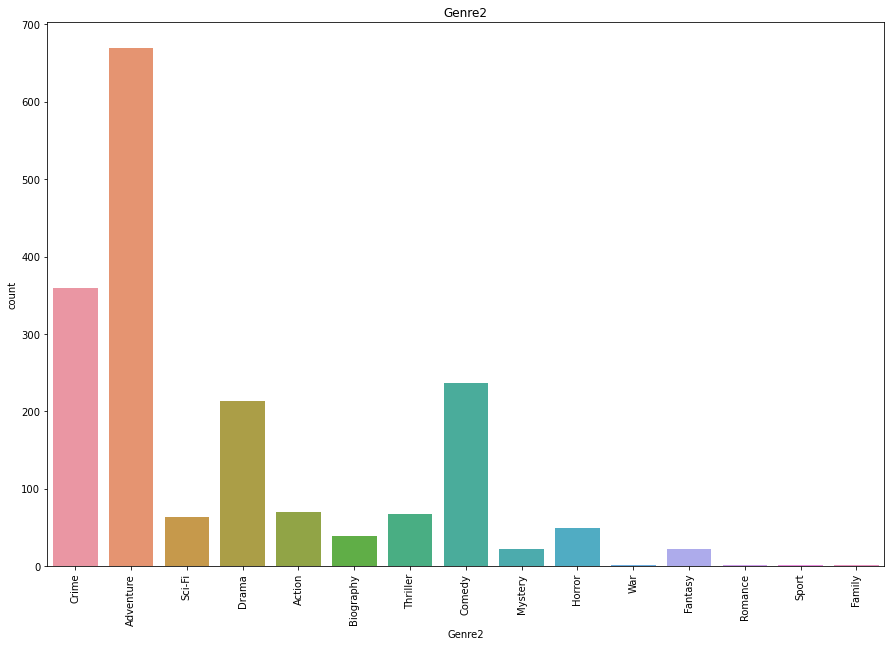

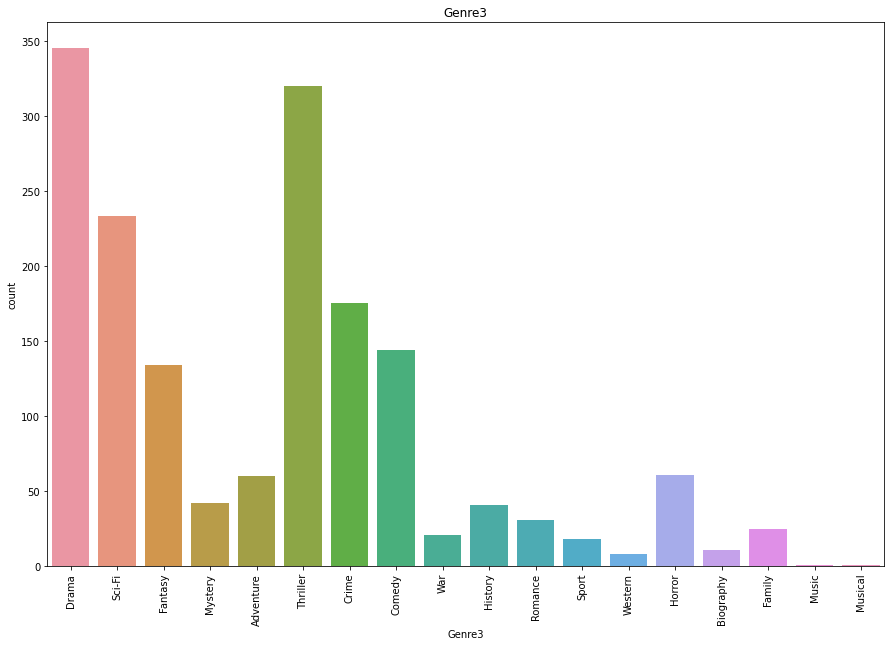

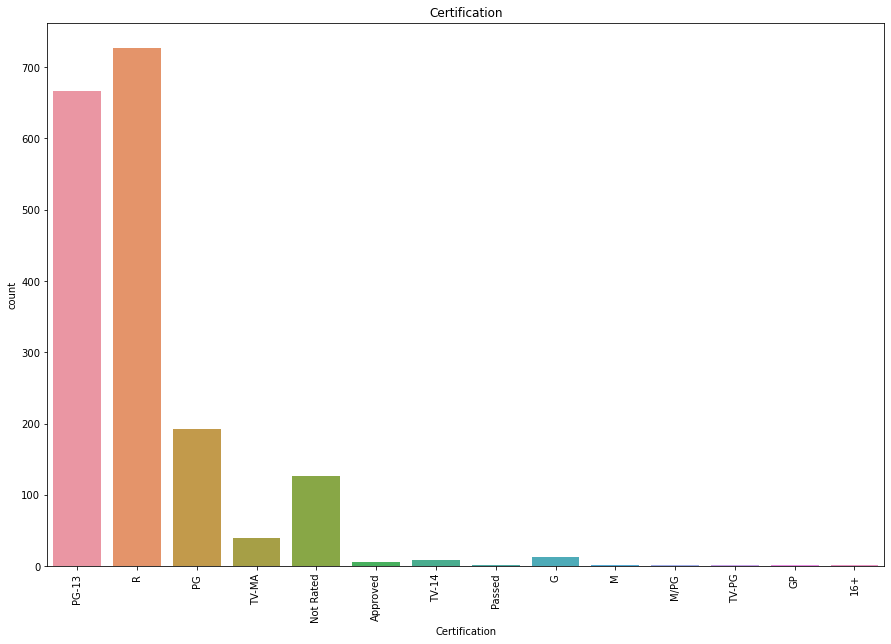

In [28]:
# we will use countplot to visualize the movies
# we will use for loop to do it
for i in obj:
    plt.figure(figsize = (15,10))
    plt.title(i)
    plt.xticks(rotation = 90)
    sns.countplot(df[i])
    plt.show()

Observations:
    
    1: Most of the movies were made in only one part very few movies which were made in more than 3 parts.
        
    2: Very few directors who directed more than 10 movies from the list.
        
    3: Lily Wachowski and Joe Russo had worked more times compare to others as 2nd director.
        
    4: There are very few lead stars who appeared in more than 5 movies from the list.
        
    5: More number of movies were made in Action Genre.
        
    6: The 2nd most popular genre is Adventure followed by Crime.
        
    7: The 3rd most popular genre is Drama followed by Thriller.
        
    8: Most of the movies are certified R followed by PG-13.

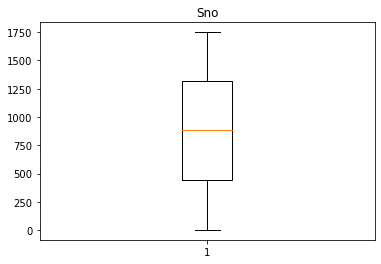

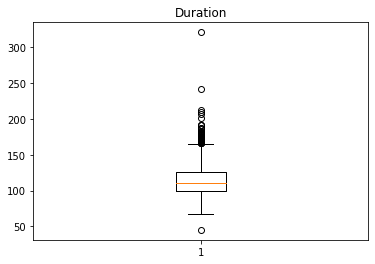

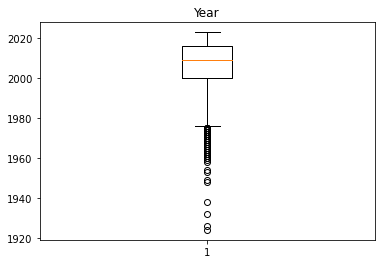

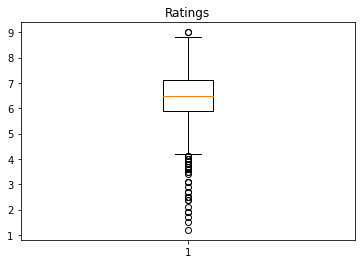

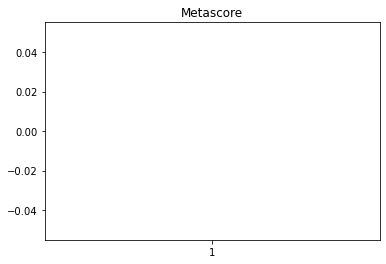

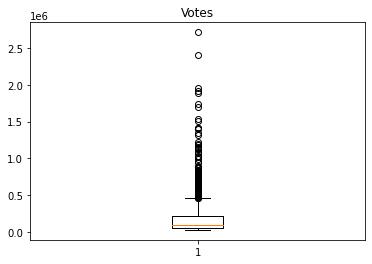

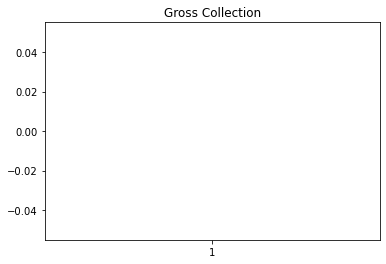

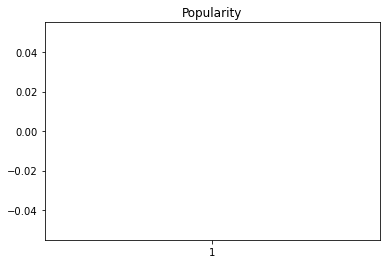

In [29]:
# Let's do the boxplot analysis of numeric data
for i in num:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()

Observations:
    
    1: Most movies have runtime duration between 75 mins to 150 mins very few movies have runtime more than that.
        
    2: Most of the movies were made in after year 2000 before that very few movies were made.
        
    3: The average rating of movies from list is 6.5.
        
    4: Average voting of movies are done by 1 to 2 lakh people.

### Top 10 years when there was highest average voting

In [30]:
highest_voting = df.groupby('Year')['Votes'].mean().sort_values(ascending = False)
voting = pd.DataFrame(highest_voting[ : 10])
voting = voting.reset_index()

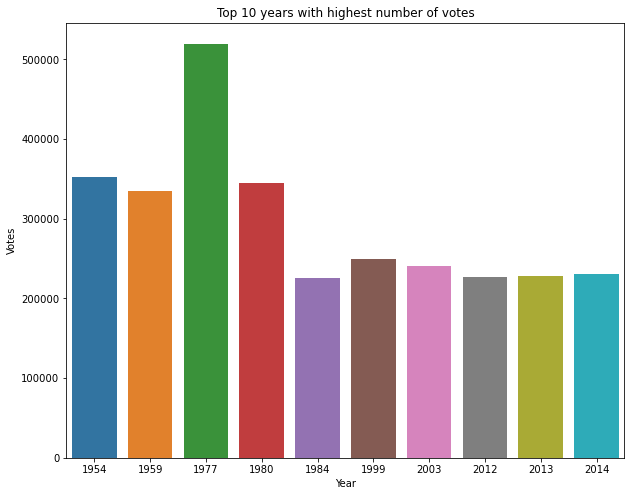

In [31]:
# let's visualize it using barplot
plt.figure(figsize = (10,8))
plt.title('Top 10 years with highest number of votes')
sns.barplot(x = 'Year', y = 'Votes', data = voting)
plt.show()

*Here we can see the years in which the more number of people have done the votings as compare to other years from which the highest number of voting is done in year 1977 by more than 5L people.*

### Top 10 years when there was highest gross collection done by movies

In [32]:
collection = df.groupby('Year')['Gross Collection'].mean().sort_values(ascending = False)
top_collection = pd.DataFrame(collection[ : 10])
top_collection = top_collection.reset_index()

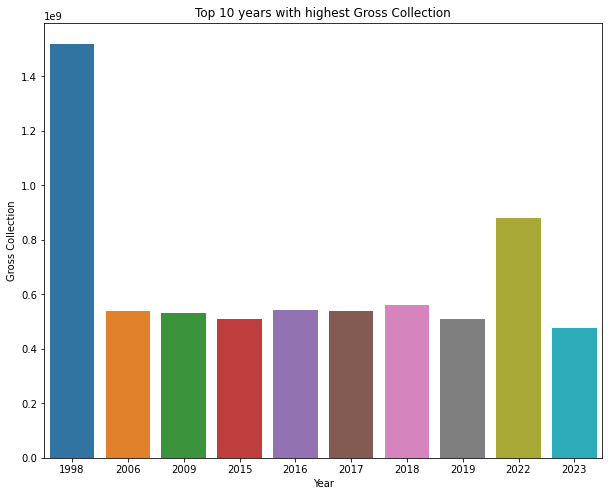

In [33]:
# let's visualize it
plt.figure(figsize = (10, 8))
plt.title('Top 10 years with highest Gross Collection')
sns.barplot(x = 'Year', y = 'Gross Collection', data = top_collection)
plt.show()

*In year 1998 movies have done highest gross collection.*

### Top 10 years with highest average metascore

In [34]:
highest_metascore = df.groupby('Year')['Metascore'].mean().sort_values(ascending = False)
metascore = pd.DataFrame(highest_metascore[ : 10])
metascore = metascore.reset_index()

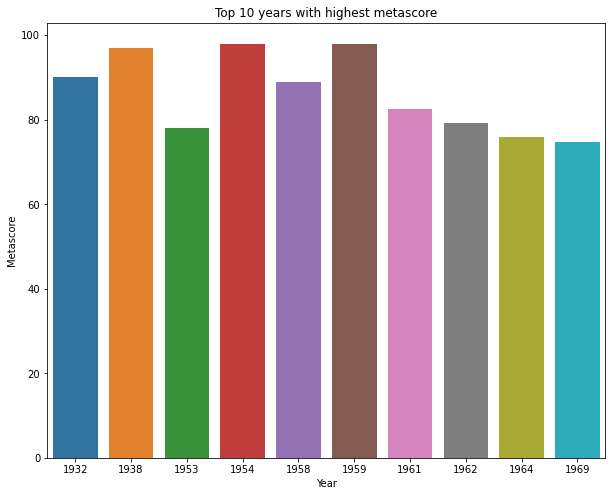

In [35]:
# let's visualize it
plt.figure(figsize = (10, 8))
plt.title('Top 10 years with highest metascore')
sns.barplot(x = 'Year', y = 'Metascore', data = metascore)
plt.show()

*In these years the movies had highest average metascore.*

### Top 10 years with highest average movies popularity

In [36]:
highest_popularity = df.groupby('Year')['Popularity'].mean().sort_values(ascending = False)
popularity = pd.DataFrame(highest_popularity[ : 10])
popularity = popularity.reset_index()

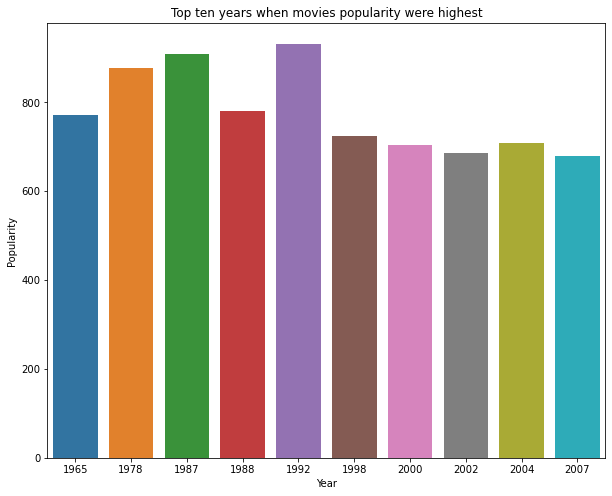

In [37]:
plt.figure(figsize = (10, 8))
plt.title('Top ten years when movies popularity were highest')
sns.barplot(x = 'Year', y = 'Popularity', data = popularity)
plt.show()

*In these years the movies had highest average popularity.*

### Top 10 director according to ratings.

In [38]:
top_directors = df.groupby('Director1 Name')['Ratings'].mean().sort_values(ascending  = False)
top10_directors = pd.DataFrame(top_directors[ : 10])
top10_directors = top10_directors.reset_index()

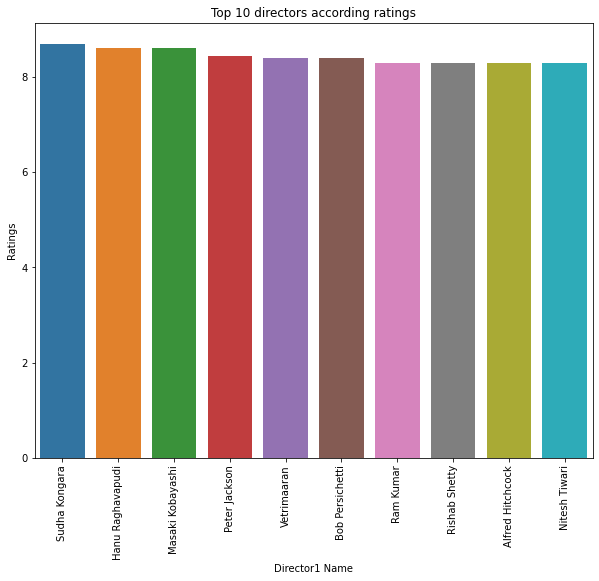

In [39]:
# let's visualize it
plt.figure(figsize = (10, 8))
plt.title('Top 10 directors according ratings')
plt.xticks(rotation = 90)
sns.barplot(x = 'Director1 Name', y = 'Ratings', data = top10_directors)
plt.show()

*These are the top 10 directors whose movies have highest average ratings.*

### Top 10 directors whose movies have highest metascore

In [40]:
dir_metascore = df.groupby('Director1 Name')['Metascore'].mean().sort_values(ascending = False)
dir10_metascore = pd.DataFrame(dir_metascore[ : 10])
dir10_metascore = dir10_metascore.reset_index()

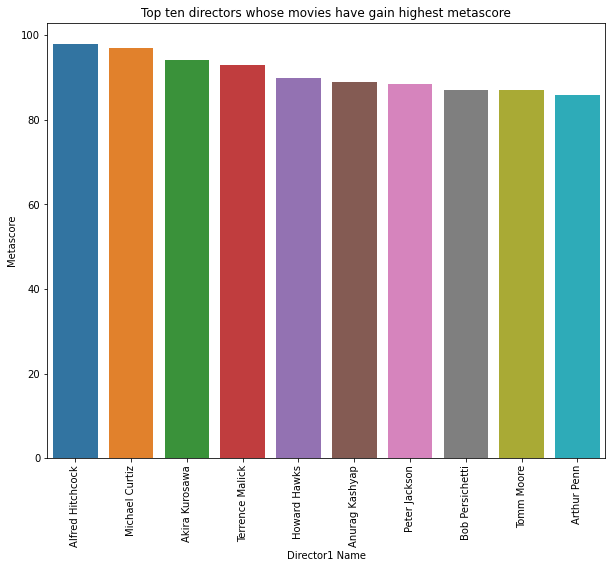

In [41]:
plt.figure(figsize = (10, 8))
plt.title('Top ten directors whose movies have gain highest metascore')
plt.xticks(rotation = 90)
sns.barplot(x = 'Director1 Name', y = 'Metascore', data = dir10_metascore)
plt.show()

*These are the top 10 directors whose movies have highest metascore.*

### Top 10 directors whose movies have highest average popularity

In [42]:
popularity_dir = df.groupby('Director1 Name')['Popularity'].mean().sort_values(ascending = False)
top10_popularity_dir = pd.DataFrame(popularity_dir[ : 10])
top10_popularity_dir = top10_popularity_dir.reset_index()

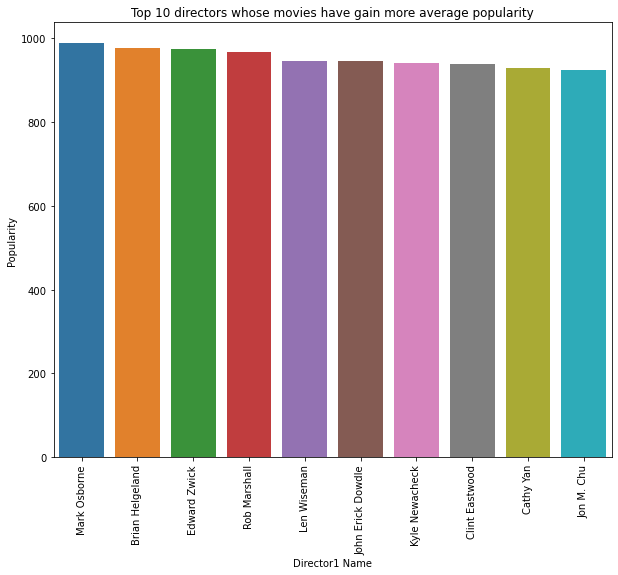

In [43]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 directors whose movies have gain more average popularity')
plt.xticks(rotation = 90)
sns.barplot(x = 'Director1 Name', y = 'Popularity', data = top10_popularity_dir)
plt.show()

### Top 10 directors whose movies have done highest gross collection

In [44]:
dir_coll = df.groupby('Director1 Name')['Gross Collection'].mean().sort_values(ascending = False)
dir10_coll = pd.DataFrame(dir_coll[ : 10])
dir10_coll = dir10_coll.reset_index()

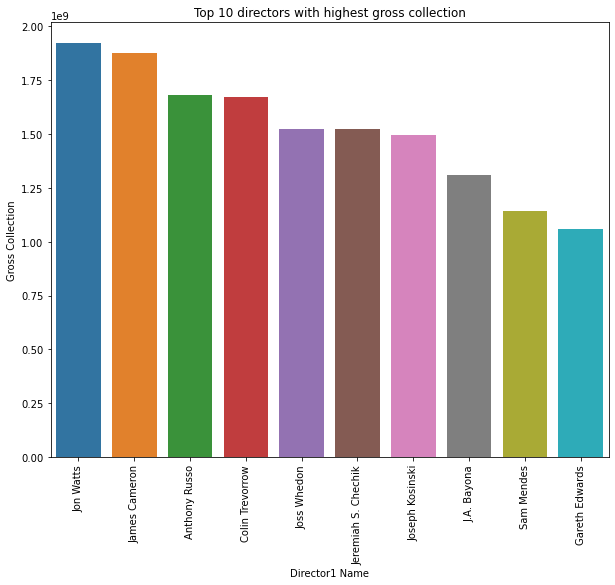

In [45]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 directors with highest gross collection')
plt.xticks(rotation = 90)
sns.barplot(x = 'Director1 Name', y = 'Gross Collection', data = dir10_coll)
plt.show()

*These are the top 10 directors whose movie have done the highest gross collection.*

### Top 10 movies with highest average ratings.

In [46]:
top_movies = df.groupby('Movie Name')['Ratings'].mean().sort_values(ascending = False)
top10_movies = pd.DataFrame(top_movies[ : 10])
top10_movies = top10_movies.reset_index()

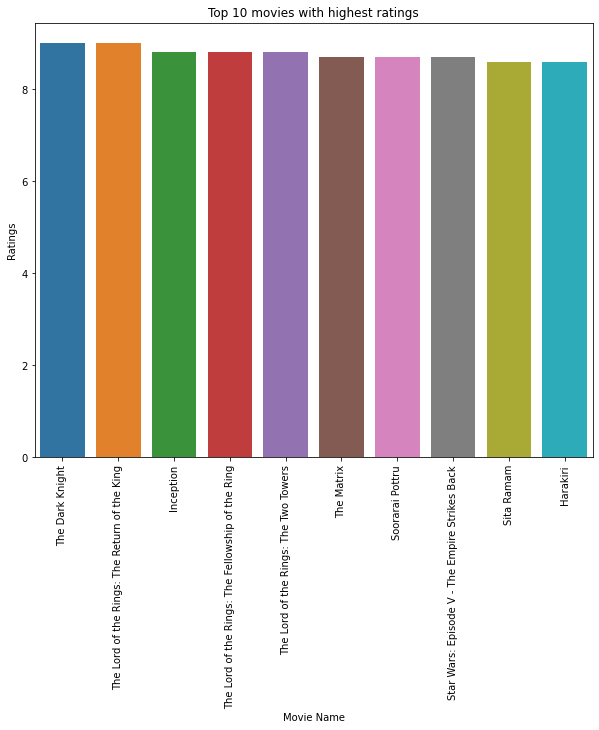

In [47]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 movies with highest ratings')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Ratings', data = top10_movies)
plt.show()

*Here are the top 10 movies with highest ratings.*

### Top 10 movies with longest Duration.

In [48]:
top_movies_duration = df.groupby('Movie Name')['Duration'].mean().sort_values(ascending = False)
top10_movies_duration = pd.DataFrame(top_movies_duration[ : 10])
top10_movies_duration = top10_movies_duration.reset_index()

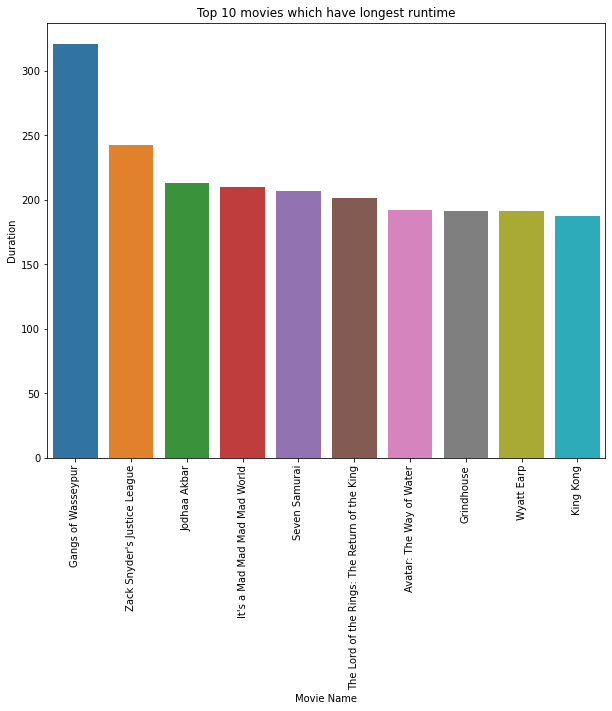

In [49]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 movies which have longest runtime')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Duration', data = top10_movies_duration)
plt.show()

*These are the top 10 movies which have longest runtime duration.*

### Top 10 movies with highest Gross Collection

In [50]:
top_collection = df.groupby('Movie Name')['Gross Collection'].mean().sort_values(ascending = False)
top10_collection = pd.DataFrame(top_collection[:10])
top10_collection = top10_collection.reset_index()

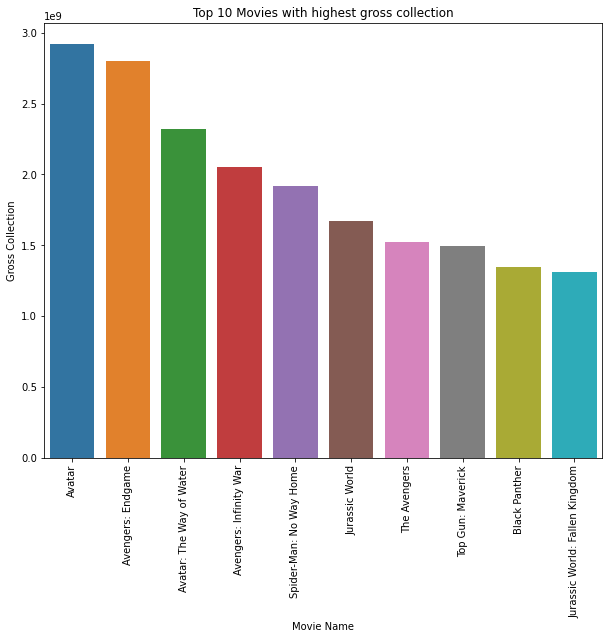

In [51]:
plt.figure(figsize = (10,8))
plt.title('Top 10 Movies with highest gross collection')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Gross Collection', data = top10_collection)
plt.show()

*These are the top 10 movies which have done the highest gross collection of all time.*

### Top 10 movies with highest metascore

In [52]:
top_metascore_movie = df.groupby('Movie Name')['Metascore'].mean().sort_values(ascending = False)
top10_metascore_movie = pd.DataFrame(top_metascore_movie[ : 10])
top10_metascore_movie = top10_metascore_movie.reset_index()

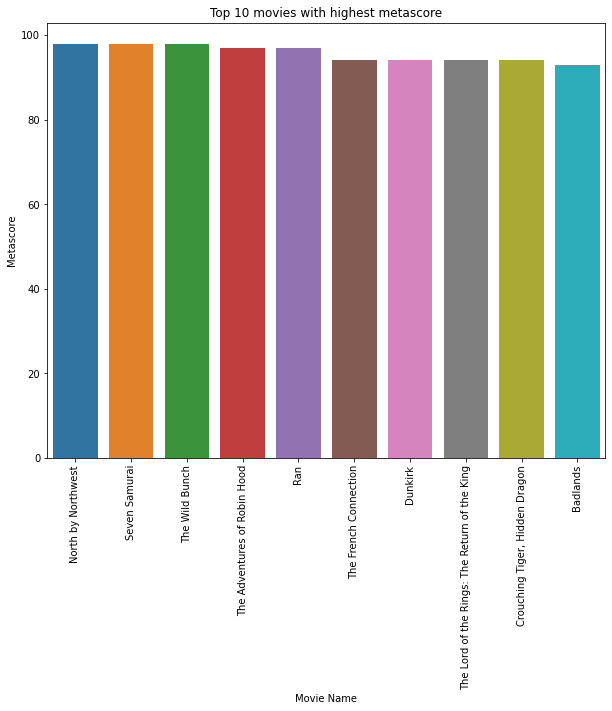

In [53]:
plt.figure(figsize = (10, 8))
plt.title('Top 10 movies with highest metascore')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Metascore', data = top10_metascore_movie)
plt.show()

*These are the top 10 movies who have highest metascore.*

### Top 20 movies with highest popularity

In [54]:
top_movie_popularity = df.groupby('Movie Name')['Popularity'].mean().sort_values(ascending = False)
top20_movie_popularity = pd.DataFrame(top_movie_popularity[ : 20])
top20_movie_popularity = top20_movie_popularity.reset_index()

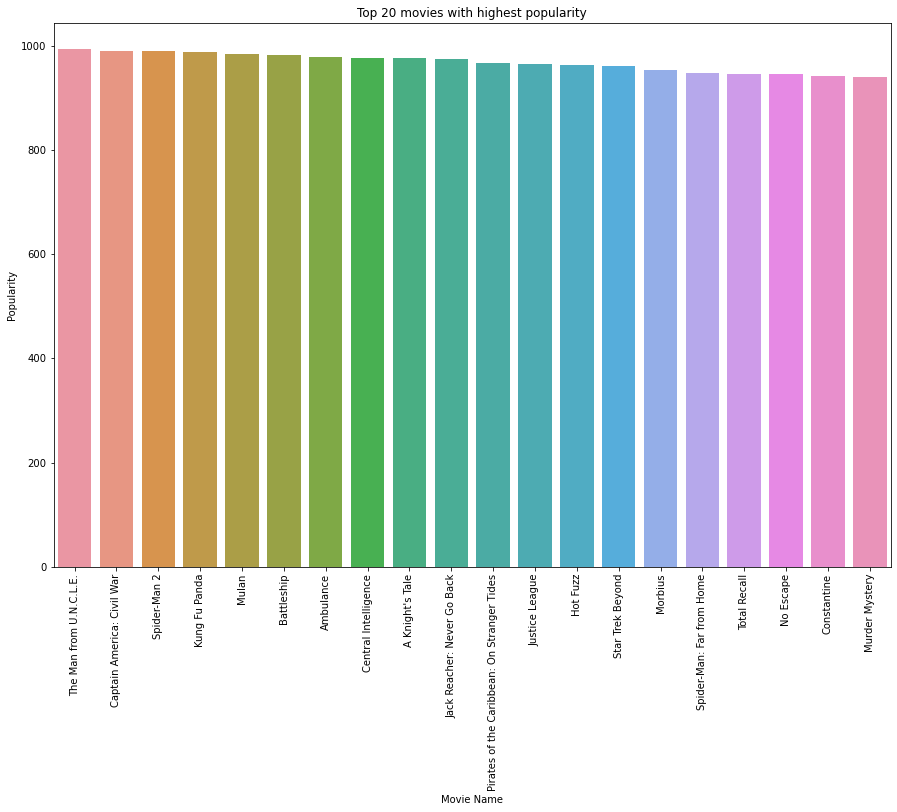

In [55]:
plt.figure(figsize = (15, 10))
plt.title('Top 20 movies with highest popularity')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Popularity', data = top20_movie_popularity)
plt.show()

*These are the top 20 movies with highest popularity.*

### Top 20 movies with highest votes

In [56]:
top_movie_votes = df.groupby('Movie Name')['Votes'].mean().sort_values(ascending = False)
top20_movie_votes = pd.DataFrame(top_movie_votes[ : 20])
top20_movie_votes = top20_movie_votes.reset_index()

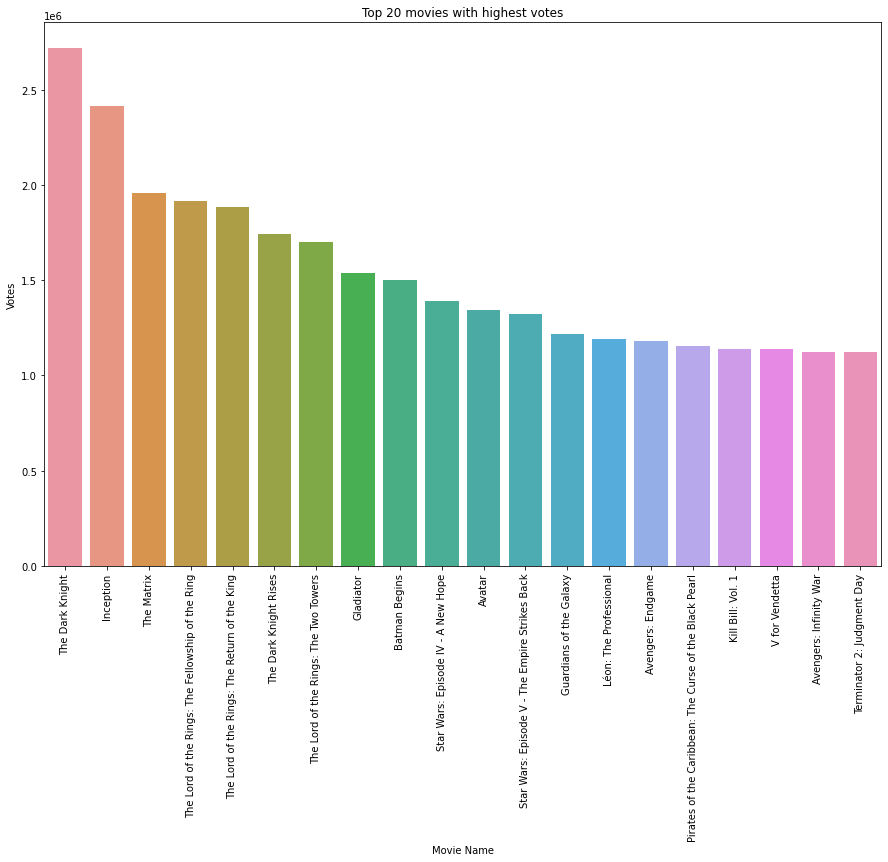

In [57]:
plt.figure(figsize = (15, 10))
plt.title('Top 20 movies with highest votes')
plt.xticks(rotation = 90)
sns.barplot(x = 'Movie Name', y = 'Votes', data = top20_movie_votes)
plt.show()

*These are the top 20 movies which have highest votes.*

### Movies released per year

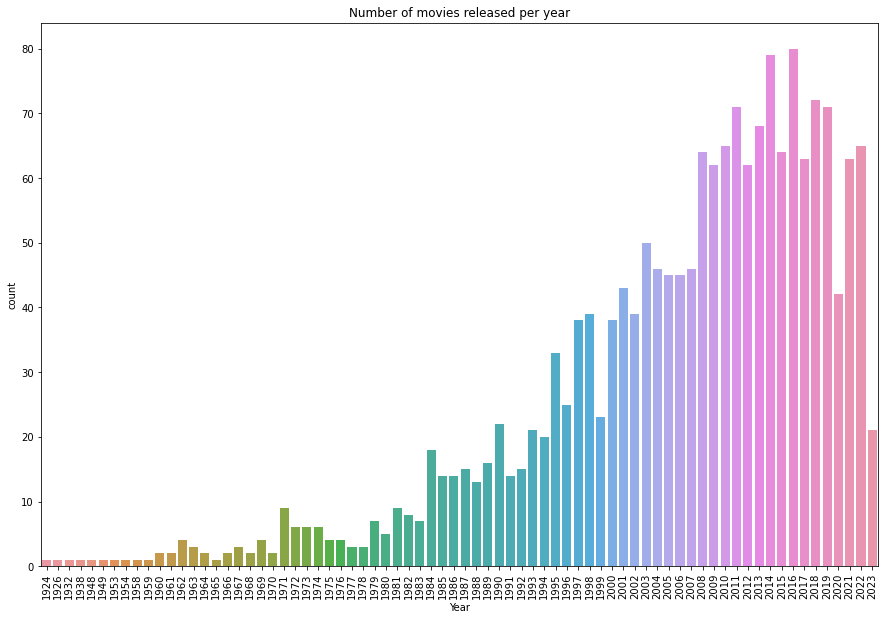

In [58]:
plt.figure(figsize = (15,10))
plt.title('Number of movies released per year')
plt.xticks(rotation = 90)
sns.countplot(x = 'Year', data = df)
plt.show()

*Here we can in early years there were very less movies released in one year but after year 2000 the number of movie release were increased and now there were more than 40 movies releases per year and it is increasing.*

### Does Rating affect the gross collection

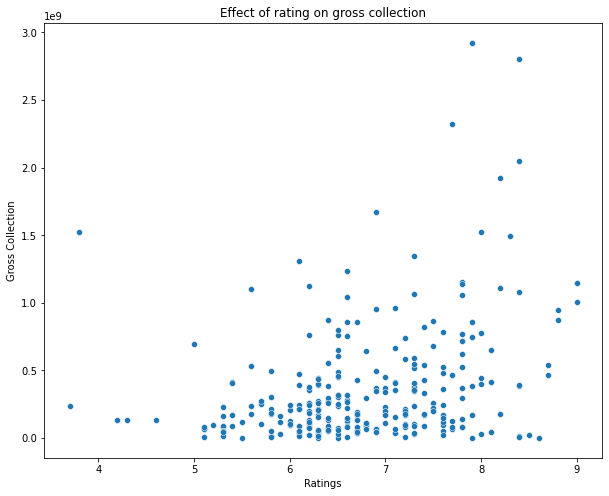

In [59]:
plt.figure(figsize = (10, 8))
plt.title('Effect of rating on gross collection')
sns.scatterplot(x = 'Ratings', y = 'Gross Collection', data = df)
plt.show()

*Here we can see most of the movies which have done the higher gross collection have ratings more than 6*

### Does voting affect the gross collection

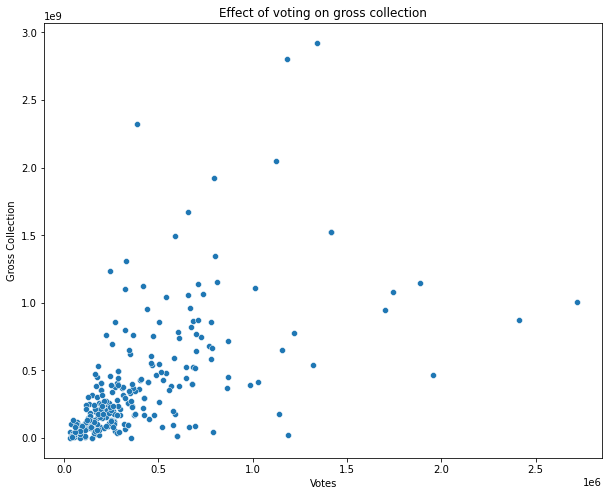

In [60]:
plt.figure(figsize = (10, 8))
plt.title('Effect of voting on gross collection')
sns.scatterplot(x = 'Votes', y = 'Gross Collection', data = df)
plt.show()

*Here we can see most movies didn't voted by more number of people but which are voted by more people they have done higher gross collection as compare to other.*

### Does metascore affect the gross collection

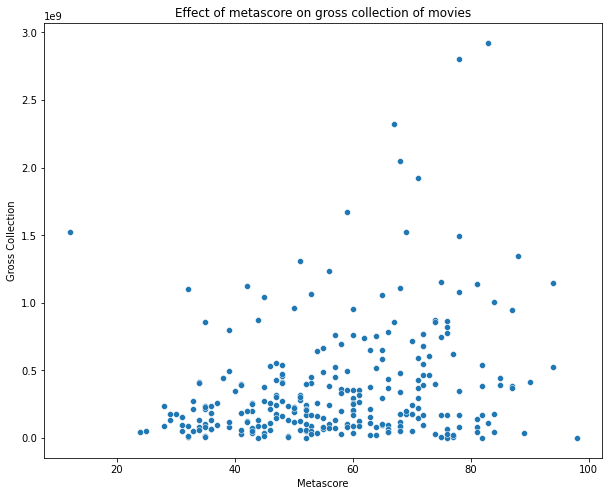

In [61]:
plt.figure(figsize = (10, 8))
plt.title('Effect of metascore on gross collection of movies')
sns.scatterplot(x = 'Metascore', y = 'Gross Collection', data = df)
plt.show()

*Movies with metascore higher than 60 have done higher gross collection.*

### Does Popularity affect the gross collection

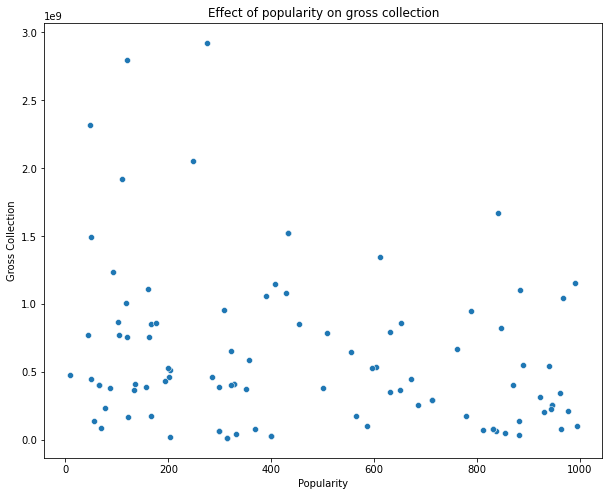

In [62]:
plt.figure(figsize = (10, 8))
plt.title('Effect of popularity on gross collection')
sns.scatterplot(x = 'Popularity', y = 'Gross Collection', data = df)
plt.show()

*Here we can see that popularity is showing the mixed relation with gross collection even some movies with less popularity score have done the higher gross collection.*

### Does duration of movie affect the gross collection

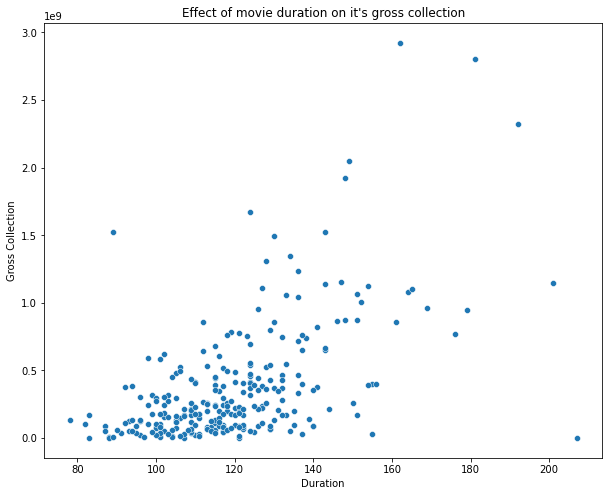

In [63]:
plt.figure(figsize = (10, 8))
plt.title("Effect of movie duration on it's gross collection")
sns.scatterplot(x = 'Duration', y = 'Gross Collection', data = df)
plt.show()

*Movies of duration nearby 120 mins have quitely more average gross collection than movies of duration less than that and few movies of duration more than that alos have done more gross collection.*

### Gross collection done by movies over the years

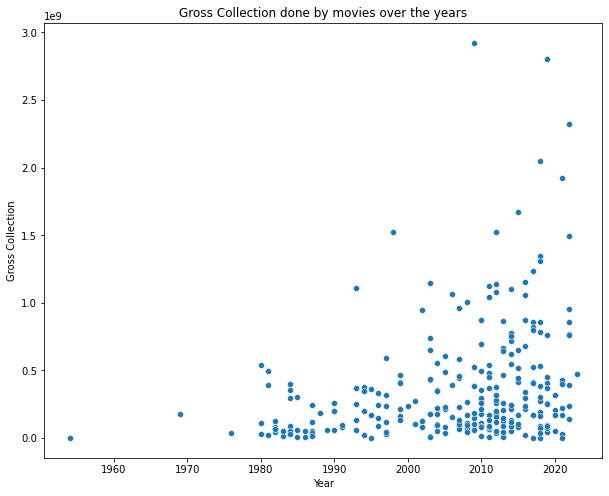

In [64]:
plt.figure(figsize = (10, 8))
plt.title('Gross Collection done by movies over the years')
sns.scatterplot(x = 'Year', y = 'Gross Collection', data = df)
plt.show()

*From here we can understand that in recent years more movies have done the high gross collection as compare to before.*

### Top 10 highest rated movies and it's director

In [65]:
top10 = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Director1 Name']]

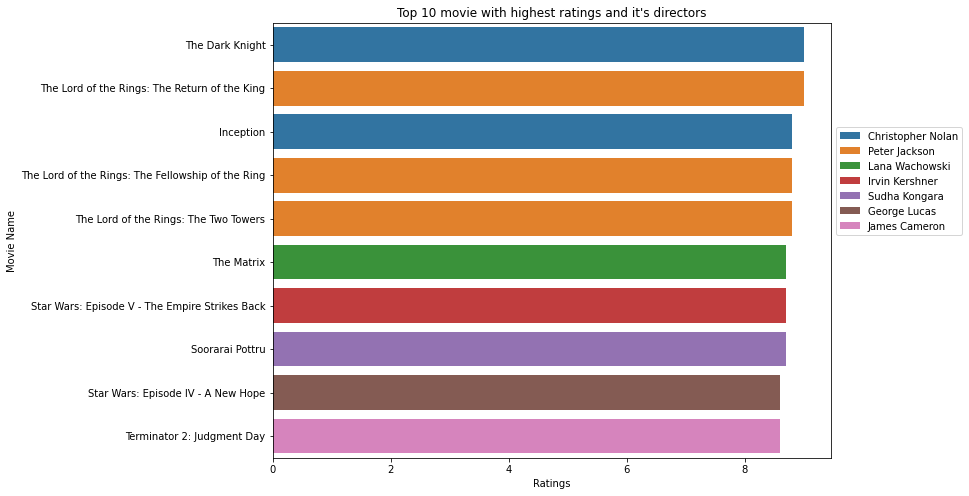

In [66]:
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and it's directors")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Director1 Name', data = top10, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the top to movies with highest ratings and their directors.*

### Top 10 movies with highest gross collection and their directors

In [67]:
top10_gross = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Director1 Name']]

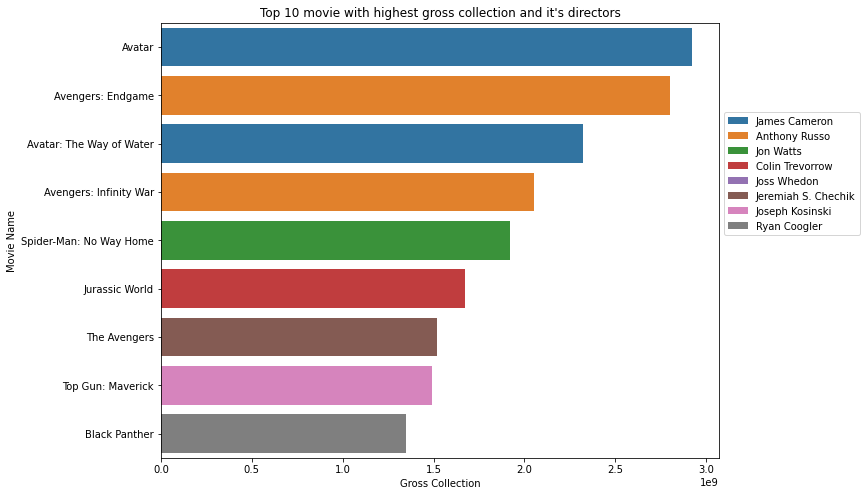

In [68]:
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's directors")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Director1 Name', data = top10_gross, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

### Top 10 movies with highest gross collection and their lead star

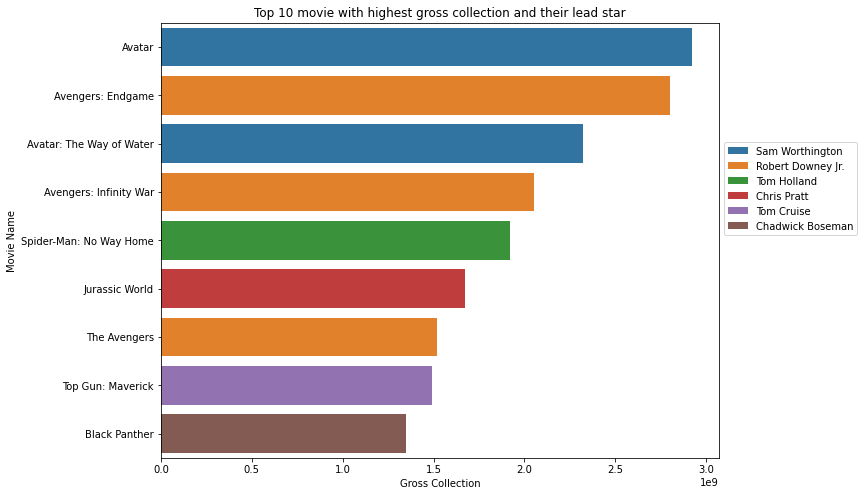

In [69]:
top10_gross_star = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Star1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and their lead star")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Star1', data = top10_gross_star, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

### Top 10 movie with highest ratings and their lead star

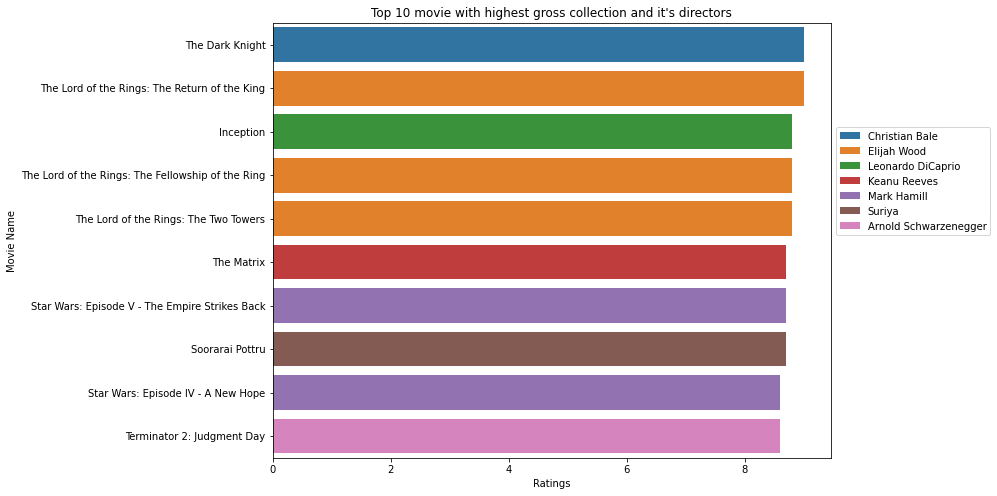

In [70]:
top10_rating_star = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Star1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's directors")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Star1', data = top10_rating_star, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

### Top 10 movies with highest gross collection and their genre

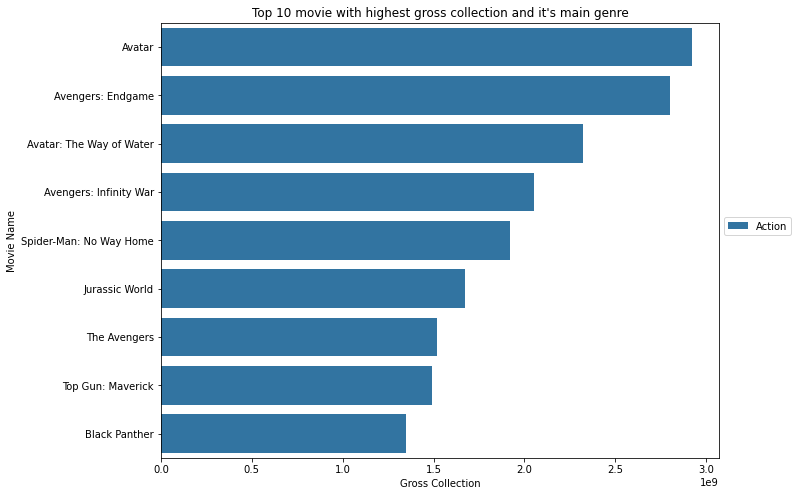

In [71]:
top10_gross_genre = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Genre1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's main genre")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Genre1', data = top10_gross_genre, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*The main genre of top 10 highest gross collection movie is Action.*

### Top 10 movies with highest ratings and its main genre

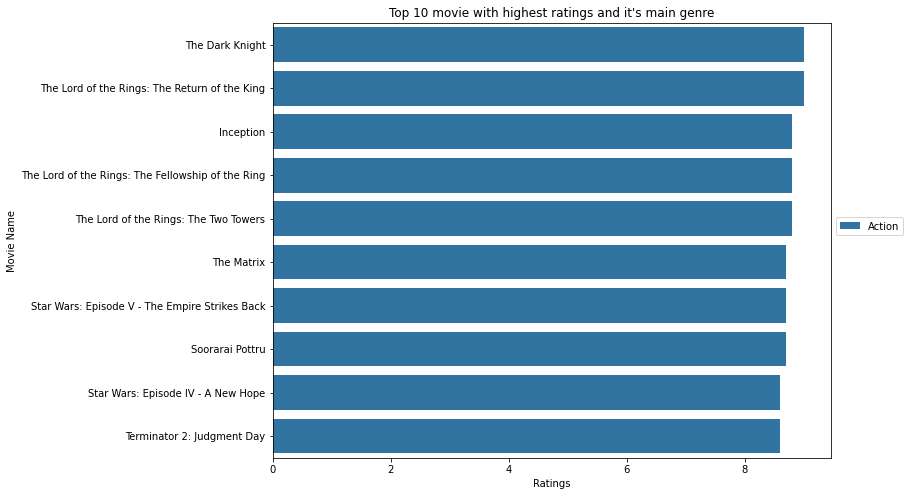

In [72]:
top10_ratings_genre = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Genre1']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and it's main genre")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Genre1', data = top10_ratings_genre, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*The main genre of top 10 highest rating movie is Action.*

### Top 10 highest gross collection movie and their release year.

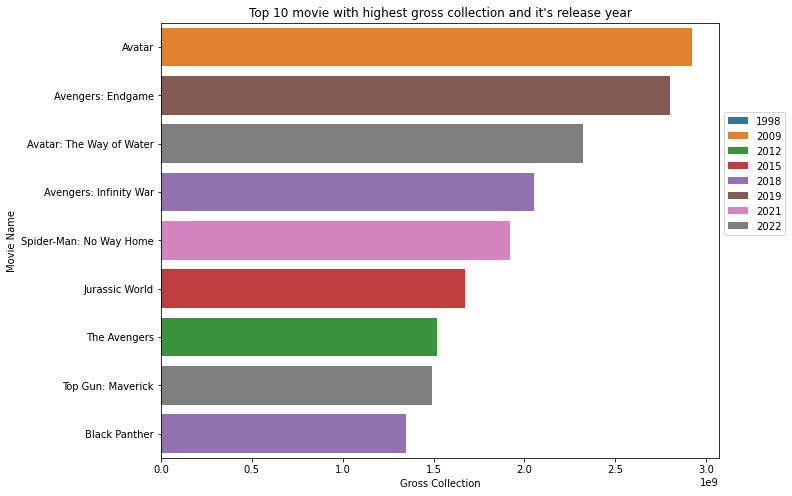

In [73]:
top10_gross_year = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Year']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's release year")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Year', data = top10_gross_year, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the movies which have done all time highest gross collection and their relase year.*

### Top 10 highest rating movie and their release year.

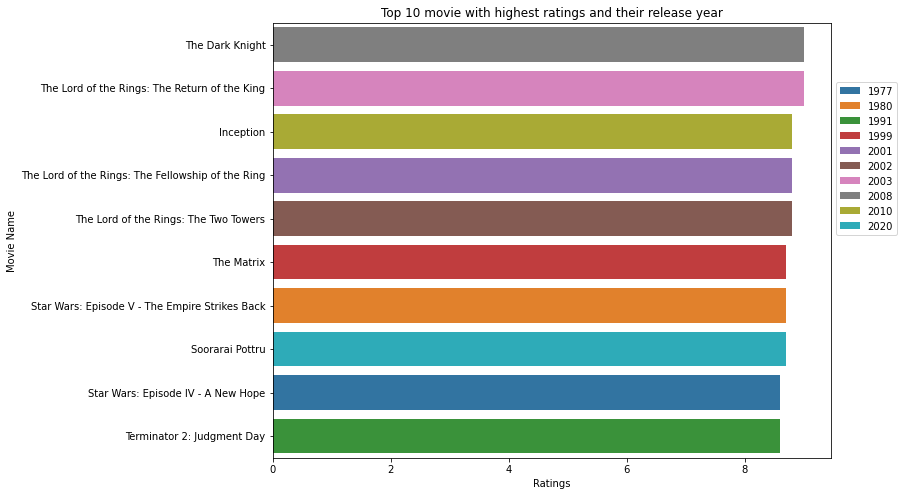

In [74]:
top10_ratings_year = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Year']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and their release year")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Year', data = top10_ratings_year, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the movies which have highest ratings and their release year.*

### Top 10 highest rating movie and their certification.

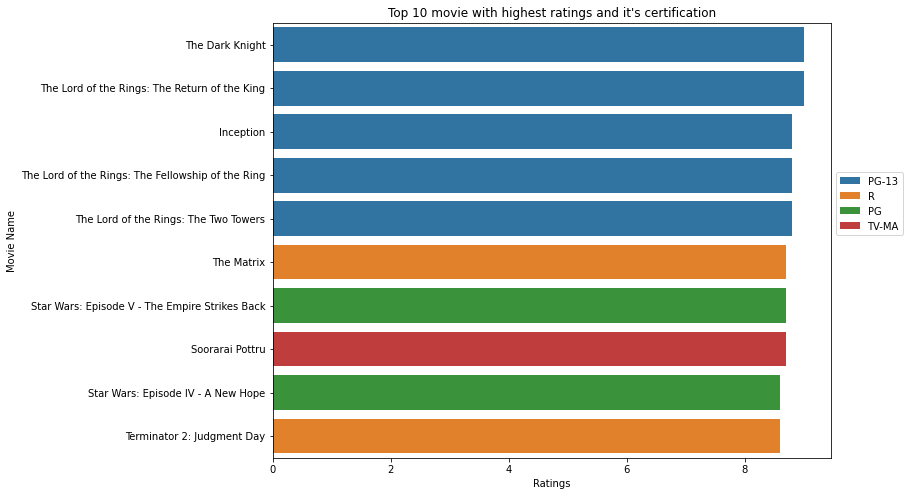

In [75]:
top10_ratings_certification = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Certification']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and it's certification")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Certification', data = top10_ratings_certification, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the movies with highest ratings and their certification.*

### Top 10 highest gross collection movie and their certification.

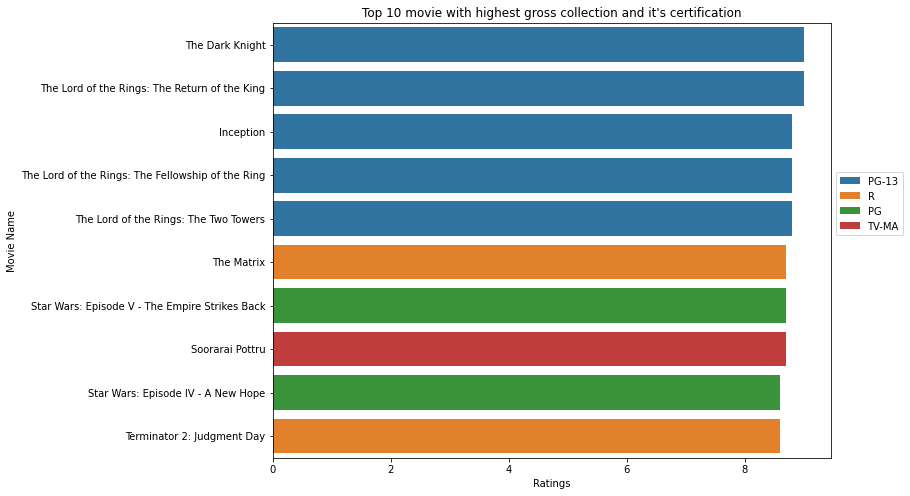

In [76]:
top10_gross_certification = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Certification']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and it's certification")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Certification', data = top10_gross_certification, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

### Top 10 movies with highest ratings and their gross collection

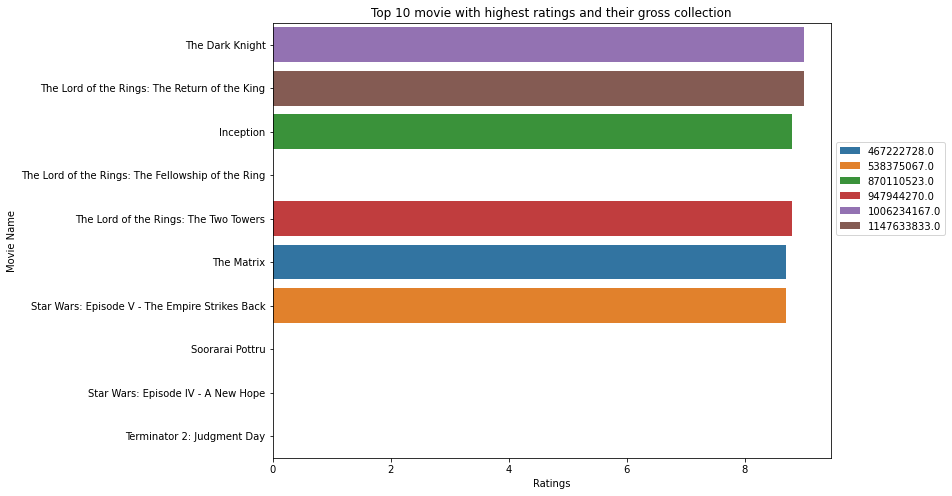

In [77]:
top10_ratings_collection = df.nlargest(10, 'Ratings')[['Movie Name', 'Ratings', 'Gross Collection']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest ratings and their gross collection")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Gross Collection', data = top10_ratings_collection, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the movies which have highest ratings and their gross collection.*

### Top 10 movies with highest gross collection and their ratings

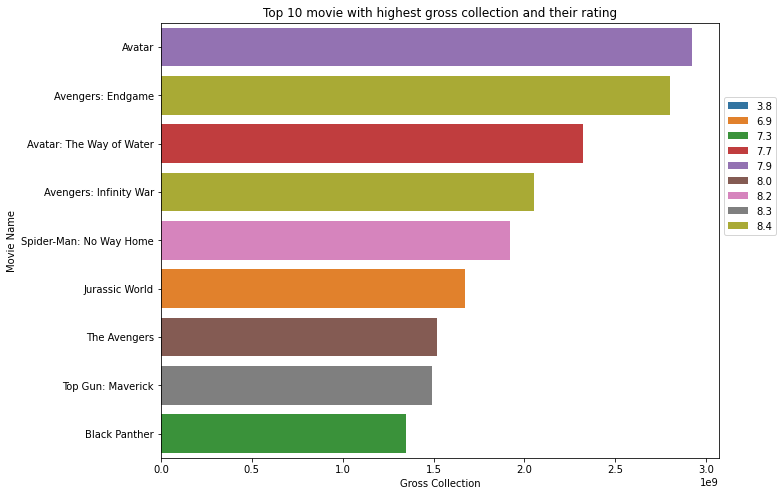

In [78]:
top10_gross_rating = df.nlargest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Ratings']]
plt.figure(figsize = (10, 8))
plt.title("Top 10 movie with highest gross collection and their rating")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Ratings', data = top10_gross_rating, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*From here we can understand that most of the time higher ratings movie also have higher gross collection.*

### 10 movies with lowest gross collection and their ratings

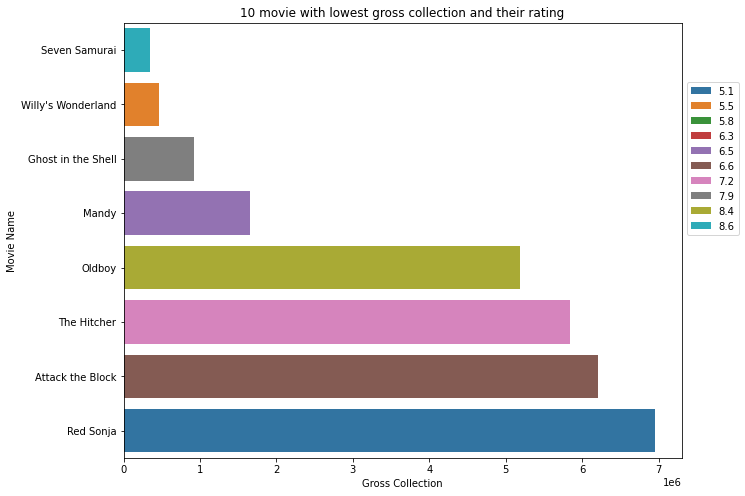

In [79]:
below10_gross_rating = df.nsmallest(10, 'Gross Collection')[['Movie Name', 'Gross Collection', 'Ratings']]
plt.figure(figsize = (10, 8))
plt.title("10 movie with lowest gross collection and their rating")
sns.barplot(x = 'Gross Collection', y = 'Movie Name', hue = 'Ratings', data = below10_gross_rating, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the 10 movies which have done the lowest gross collection but from here we can see that some movies which have done the lowest gross also have high ratings it means it doesn't totally depends on ratings.*

### 10 Movies with lowest ratings and their gross collection

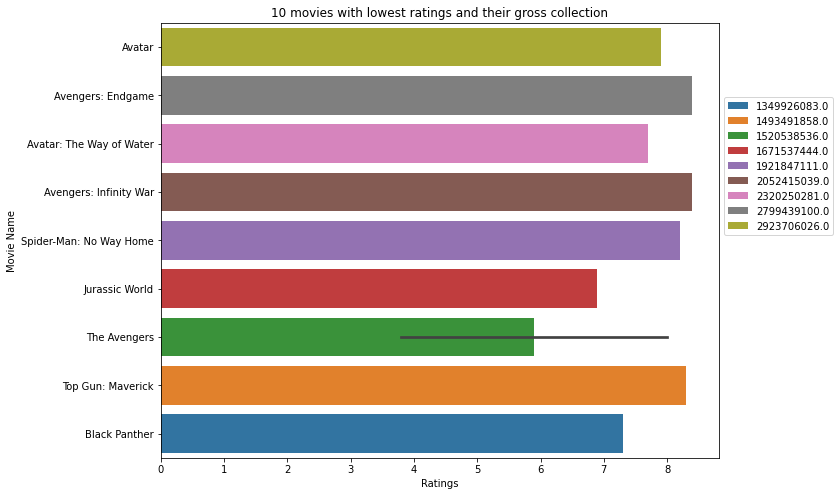

In [80]:
below10_rating_gross = df.nsmallest(10, 'Ratings')[['Movie Name', 'Gross Collection', 'Ratings']]
plt.figure(figsize = (10, 8))
plt.title("10 movies with lowest ratings and their gross collection")
sns.barplot(x = 'Ratings', y = 'Movie Name', hue = 'Gross Collection', data = top10_gross_rating, dodge = False)
plt.legend(bbox_to_anchor = (1, 0.5), loc = 3)
plt.show()

*These are the movies which have lowest ratings and their gross collection. The gross collection are also not much higher.*

# Phase 4 : Machine Learning

#### First we will make a copy of our original dataframe

In [109]:
# making a copy of the original dataset
copydf = df.copy()

### Dropping columns

In [110]:
# Columns Sno and Movie Name doesn't have to do something with the target column they were different for every index 
# so we will drop them
copydf.drop('Sno', axis = 1, inplace = True)
copydf.drop('Movie Name', axis = 1, inplace = True)

In [111]:
# we have see there we very high null values present in the Director2 column and if we fill them then it will affect the model
# so it is better to drop that column too
copydf.drop('Director2 Name', axis = 1, inplace = True)

### Filling nan values

In [85]:
# as we have seen the columns metascore, star2, star3, star4, genre2, genre3, gross collection, popularity, and certification
# have null values from them columns gross collection and popularity contains very high null values and we can't drop them 
# because we need them for our model so we will fill the columns which contains less null values with their mean, mode and 
# we will find some other ways to fill the rest two columns because we can't fill it with their mean values it will make 
# the model biased

In [112]:
# filling nan values
copydf['Metascore'].fillna(copydf['Metascore'].mean(), inplace = True)
copydf['Star2'].fillna(copydf['Star2'].mode()[0], inplace = True)
copydf['Star3'].fillna(copydf['Star3'].mode()[0], inplace = True)
copydf['Star4'].fillna(copydf['Star4'].mode()[0], inplace = True)
copydf['Genre2'].fillna(copydf['Genre2'].mode()[0], inplace = True)
copydf['Genre3'].fillna(copydf['Genre3'].mode()[0], inplace = True)
copydf['Certification'].fillna(copydf['Certification'].mode()[0], inplace = True)

In [113]:
# checking for null values after filling them
copydf.isnull().sum()

Director1 Name         0
Duration               0
Year                   0
Ratings                0
Metascore              0
Star1                  0
Star2                  0
Star3                  0
Star4                  0
Votes                  0
Genre1                 0
Genre2                 0
Genre3                 0
Gross Collection    1544
Popularity          1510
Certification          0
dtype: int64

*Here we can see all columns which contains less null values we have filled them and for the rest two columns we will try different approaches and then we will evaluate its effect on our model performance.*

### Encoding

Before we fill the null values of rest two columns let's encode the categorical data first.

In [115]:
# as we know most of the columns contains very high unique categories so we will try some different methods to encode them 
# for rest of the columns which contains less unique categories we will use label encoder to encode them

# making a list of columns which contains less number of unique features
less_uni = ['Genre1', 'Genre2', 'Genre3', 'Certification']

In [116]:
# importing the required library
from sklearn.preprocessing import LabelEncoder

In [117]:
# holding it in a variable
le = LabelEncoder()

In [118]:
# we will use for loop to encode only selected columns of the dataframe
for i in less_uni:
    copydf[i] = le.fit_transform(copydf[i])

In [201]:
# now we will encode the Director1 Name column according to it's frequency, like the director who directed most number of movies
# from the list will be assigned as 1, then 2, then 3 in descending order upto 15 and 16 will be assigned to rest all the 
# directors

In [192]:
# First let's get the total frequency of each director in descending order
director_value_counts = copydf['Director1 Name'].value_counts()

In [203]:
# now let's create a mapping dictionary
dir_encode = {dire: i + 1 for i, dire in enumerate(director_value_counts.index[:15])}

# this line of code will iterates the first 15 most frequent directors as we have given index range [ : 15] 
# i is the index position of the value in iteration it starts from 0 and increase by 1 for each value
# dire represents the each unique value in iteration
# here we have given i + 1 to make sure the encoding starts from 1
# the resulted key value pair (dire : i + 1 for i) are collected in a dictionary and assigned to the dir_encode vriable

In [204]:
# now we will fill those values with the encoded values and rest all will be filled by 16
copydf['Director1 Name'] = copydf['Director1 Name'].map(dir_encode).fillna(16)

*The Director column has encoded now we will encode the rest all columns in same way.*

In [209]:
copydf.columns

Index(['Director1 Name', 'Duration', 'Year', 'Ratings', 'Metascore', 'Star1',
       'Star2', 'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2', 'Genre3',
       'Gross Collection', 'Popularity', 'Certification'],
      dtype='object')

**Encoding Star1 Column**

In [212]:
star1_value_counts = copydf['Star1'].value_counts()
star1_encode = {st1: i + 1 for i, st1 in enumerate(star1_value_counts.index[:15])}
copydf['Star1'] = copydf['Star1'].map(star1_encode).fillna(16)

**Encoding star2 column**

In [214]:
star2_value_counts = copydf['Star2'].value_counts()
star2_encode = {st2: i + 1 for i, st2 in enumerate(star2_value_counts.index[:15])}
copydf['Star2'] = copydf['Star2'].map(star2_encode).fillna(16)

**Encoding star3 column**

In [215]:
star3_value_counts = copydf['Star3'].value_counts()
star3_encode = {st3: i + 1 for i, st3 in enumerate(star3_value_counts.index[:15])}
copydf['Star3'] = copydf['Star3'].map(star3_encode).fillna(16)

**Encoding star4 column**

In [216]:
star4_value_counts = copydf['Star4'].value_counts()
star4_encode = {st4: i + 1 for i, st4 in enumerate(star4_value_counts.index[:15])}
copydf['Star4'] = copydf['Star4'].map(star4_encode).fillna(16)

**Encoding Year column**

In [227]:
# we will encode the year column also to make it more understandable for the model as it is datetime data type
# we will assign the value 1 for the movies which release year is 2023 and 0 which release year is more then 2023 and 2 for
# those which release year was 2022, then 3 in decending order upto 10 i.e. for year 2014 and for rest all years we will 
# assign only one value 11

In [228]:
# we will make a use defined function for this
def year(year):
    if year>2023:
        return 0
    
    elif year == 2023:
        return 1
    
    elif year == 2022:
        return 2
    
    elif year == 2021:
        return 3
    
    elif year == 2020:
        return 4
    
    elif year == 2019:
        return 5
    
    elif year == 2018:
        return 6
    
    elif year == 2017:
        return 7
    
    elif year == 2016:
        return 8
    
    elif year == 2015:
        return 9
    
    elif year == 2014:
        return 10
    
    else:
        return 11

In [229]:
# now we will apply this function to the dataframe
copydf['Year'] = copydf['Year'].apply(year)

*Now year column is also encoded.*

### Outliers

In [232]:
# importing library
from scipy.stats import zscore

In [259]:
# checking for zscore values of every data
z = np.abs(zscore(copydf))

In [264]:
# assigning threshold value and finding the data whose threshold value is greater than 3
threshold = 3
out = np.where(z>3)

In [268]:
# Let's check how much data will be lost 
pd.DataFrame(out).shape

(2, 555)

It will remove 555 rows

In [269]:
# shape of original dataframe
copydf.shape

(1818, 16)

it contains 1818 rows

In [272]:
# data loss
data_loss = ((1818-1263)/1818)*100
data_loss

30.528052805280524

Here we can see after removing the outliers our 30% data will be lost and it is not acceptable range of data loss so we will not remove the outliers.

# 1st approach

As we have done the required data preprocessing for the model now we will done the rest preprocessing with different approaches and then see the model performance because we have too much nan values in two columns so we need to do that.

### Filling Nan Values

As we have two columns left with lots of null values and we need to fill them so now we will fill them and then do the further process

In [282]:
# As the nan values are very high so we will not fill it with it's mean value otherwise model will be biased 

In [281]:
# first we will make a copy of the dataframe and use that copied dataframe to train the model so if we don't get the better
# model performance we don't need to do the entire process again we will make another copy of the model and fill it with
# different method and then evaluate the model performance

In [304]:
# making copy of the dataframe
newdf1 = copydf.copy()

In [305]:
# filling nan values with forward fill method
newdf1['Gross Collection'].fillna(method = 'ffill', inplace = True)
newdf1['Popularity'].fillna(method = 'ffill', inplace = True)

## 1st approach 1st model: to predict votes

### Splitting data

Now we will split the data into input and target.

In [362]:
# splitting the data into input and target
newdf1_x = newdf1.drop('Votes', axis = 1)
newdf1_y = newdf1['Votes']

### Skewness

We have seen some numerical columns have little skewness in data we will handle them.

As we know we have two target variables so we will do this for both of them differently.

In [296]:
# importing library
from sklearn.preprocessing import PowerTransformer

In [297]:
# making instance of this
pt = PowerTransformer()

In [371]:
# sending input data to transform into normal distribution
normal = pt.fit_transform(newdf1_x)

newdf1_inp_x = pd.DataFrame(normal, columns = newdf1_x.columns)

### Scaling

Now we need to scale the input data

In [370]:
# importing the required library
from sklearn.preprocessing import StandardScaler

# holding them into instance
ssc = StandardScaler()

In [373]:
# passing input data for scaling
scaled = ssc.fit_transform(newdf1_inp_x)

# making pandas dataframe of output data
newdf1_x1 = pd.DataFrame(scaled, columns = newdf1_inp_x.columns)

### Model Building

Now we will build model to predict votes

In [314]:
# importing regression algorithms and validation matrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# importing validation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [315]:
# making instance of models
lr1 = LinearRegression()
svr1 = SVR()
dtr1 = DecisionTreeRegressor()
knn1 = KNeighborsRegressor()
rfr1 = RandomForestRegressor()

### Random State

In [376]:
# now first we will find the best random state to split our data
for i in range(20, 50):
    X_train1, X_test1, Y_train1, Y_test1 = train_test_split(newdf1_x1, newdf1_y, test_size = 0.20, random_state = i)
    # we will take 20% data for testing
    
    # using random forest regressor model for this
    rfr1.fit(X_train1, Y_train1)
    
    pre1 = rfr1.predict(X_test1)
    
    # Checking score
    print('At Random state', i, 'accuracy score is', rfr1.score(X_train1, Y_train1))
    print('At Random state', i, 'R2 score is', r2_score(Y_test1, pre1), '\n', '\n')

At Random state 20 accuracy score is 0.950740600879318
At Random state 20 R2 score is 0.6291478352583284 
 

At Random state 21 accuracy score is 0.9541620426167854
At Random state 21 R2 score is 0.47621235310159216 
 

At Random state 22 accuracy score is 0.9438262246961879
At Random state 22 R2 score is 0.7622463775478431 
 

At Random state 23 accuracy score is 0.9512351807690029
At Random state 23 R2 score is 0.6773163396120365 
 

At Random state 24 accuracy score is 0.9483559946998518
At Random state 24 R2 score is 0.6738482850647319 
 

At Random state 25 accuracy score is 0.9580097680600201
At Random state 25 R2 score is 0.2901819652234784 
 

At Random state 26 accuracy score is 0.951593506007095
At Random state 26 R2 score is 0.5942528485869267 
 

At Random state 27 accuracy score is 0.9397328776628051
At Random state 27 R2 score is 0.7244782037238935 
 

At Random state 28 accuracy score is 0.9587320577756094
At Random state 28 R2 score is 0.5389697377420228 
 

At Random s

From here we can see at every random state model is giving very good accuracy score but not giving good r2 score at every random state. At random state 29 we can see it is giving the accuracy and r2 score comparatively high, the score is high on other random state as compare to 29 but the r2 scores were not high, so we will use random state 29 to split the data.

### Data Splitting for training and testing

In [377]:
# splitting the data at random state 29
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(newdf1_x1, newdf1_y, test_size = 0.20, random_state = 29)

In [378]:
# checking shape of data
print('Input training data shape:', X_train1.shape)
print('Target trainig data shape:', Y_train1.shape)
print('Input test data shape:', X_test1.shape)
print('Target test data shape:', Y_test1.shape)

Input training data shape: (1454, 15)
Target trainig data shape: (1454,)
Input test data shape: (364, 15)
Target test data shape: (364,)


### Model Training

In [379]:
# first we will make a list of all models
model1 = [lr1, dtr1, svr1, knn1, rfr1]

# now we will use for loop to train every model one by one and evaluate it's performance
for model in model1:
    model.fit(X_train1, Y_train1)
    
    # checking score for train data
    score_votes = model.score(X_train1, Y_train1)
    
    # making prediction on test data
    pred_votes = model.predict(X_test1)
    
     # checking r2_score
    r2_votes = r2_score(pred_votes, Y_test1)
    
    # checking mean absolute error
    mae_votes = mean_absolute_error(pred_votes, Y_test1)
    
    # checking mean squared error
    mse_votes = mean_squared_error(pred_votes, Y_test1)
    
    # checking root mean squared error
    rmse_votes = np.sqrt(mse_votes)
    
    print('Performance of model', model, ':')
    print('Training accuracy:', score_votes)
    print('r2_score:', r2_votes)
    print('mean absolute error:', mae_votes)
    print('mean squared error:', mse_votes)
    print('root mean squared error:', rmse_votes)
    print('\n')

Performance of model LinearRegression() :
Training accuracy: 0.35686448617743793
r2_score: -1.0888144307531706
mean absolute error: 121980.85806157305
mean squared error: 39296394257.826454
root mean squared error: 198233.18152576388


Performance of model DecisionTreeRegressor() :
Training accuracy: 0.9998310040243364
r2_score: 0.4755835518956265
mean absolute error: 95645.3956043956
mean squared error: 28506931054.20879
root mean squared error: 168839.95692432756


Performance of model SVR() :
Training accuracy: -0.1305886413076689
r2_score: -76925413.26712775
mean absolute error: 129260.20429662208
mean squared error: 68804016815.17065
root mean squared error: 262305.1978424573


Performance of model KNeighborsRegressor() :
Training accuracy: 0.6404420224857055
r2_score: 0.1387532700160179
mean absolute error: 95354.70164835165
mean squared error: 23706171597.734837
root mean squared error: 153968.08629626737


Performance of model RandomForestRegressor() :
Training accuracy: 0.9432

*Here we can see to predict the votes the training accuracy of two models Decision Tree and Random Forest are quite good but their r2 score are not upto the mark that means model is training the data quite well but is not able to capture the variability in test data well and also ther errors are very high so we will try some more different approached before selecting the model to predict votes.*

### Final model Training: Predicting votes

In [490]:
rfr1.fit(X_train1, Y_train1)

RandomForestRegressor()

### Model Evaluation

In [491]:
# checking score on training data
rfr1.score(X_train1, Y_train1)

0.9414258788516838

*The model's score on training data is quite good.*

In [492]:
# making prediction from model
rfr1_pred_votes = rfr1.predict(X_test1)

In [493]:
# checking r2 score
r2_score(rfr1_pred_votes, Y_test1)

0.6545516891529961

*The r2 score of model is little less that means it is not too much understanding the underlying patterns on test data and there are some loops which the model is missign to understand we will try different method to check if the model's performance is increases.*

In [495]:
# checking mean absolute error
mean_absolute_error(rfr1_pred_votes, Y_test1)

77139.44773214284

In [496]:
# checking mean squared error
mean_squared_error(rfr1_pred_votes, Y_test1)

13309704283.652523

## 1st approach 2nd model: to predict gross collection

Before trying the different approach for the 1st model let's test the model performance to predict gross collection

In [387]:
# splitting the data into input and target
newdf1_x_gross = newdf1.drop('Gross Collection', axis = 1)
newdf1_y_gross = newdf1['Gross Collection']

### Skewness

In [389]:
# sending input data to transform into normal distribution
normal1 = pt.fit_transform(newdf1_x_gross)

newdf1_gross_inp_x = pd.DataFrame(normal1, columns = newdf1_x_gross.columns)

### Scaling

In [391]:
# passing input data for scaling
scaled1 = ssc.fit_transform(newdf1_gross_inp_x)

# making pandas dataframe of output data
newdf1_gross_x1 = pd.DataFrame(scaled1, columns = newdf1_gross_inp_x.columns)

### Model Building

In [392]:
# as we have imported the models now we will just make another instances for this model
# making instance of models
lr2 = LinearRegression()
svr2 = SVR()
dtr2 = DecisionTreeRegressor()
knn2 = KNeighborsRegressor()
rfr2 = RandomForestRegressor()

### Random State

In [514]:
# now first we will find the best random state to split our data
for i in range(20, 50):
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(newdf1_gross_x1, newdf1_y_gross, test_size = 0.15, random_state = i)
    # we will take 15% data for testing
    
    # using random forest regressor model for this
    rfr2.fit(X_train2, Y_train2)
    
    pre2 = rfr2.predict(X_test2)
    
    # Checking score
    print('At Random state', i, 'accuracy score is', rfr2.score(X_train2, Y_train2))
    print('At Random state', i, 'R2 score is', r2_score(Y_test2, pre2), '\n', '\n')

At Random state 20 accuracy score is 0.9026271906522844
At Random state 20 R2 score is 0.424404973601472 
 

At Random state 21 accuracy score is 0.9104077980515265
At Random state 21 R2 score is 0.4283265135616048 
 

At Random state 22 accuracy score is 0.9109399131653739
At Random state 22 R2 score is 0.36279316734476186 
 

At Random state 23 accuracy score is 0.9062659143692802
At Random state 23 R2 score is 0.4161251721157241 
 

At Random state 24 accuracy score is 0.9041764801737926
At Random state 24 R2 score is 0.5011072830981712 
 

At Random state 25 accuracy score is 0.9145412352106368
At Random state 25 R2 score is 0.2234800599862793 
 

At Random state 26 accuracy score is 0.9167213482152764
At Random state 26 R2 score is 0.29724690614422944 
 

At Random state 27 accuracy score is 0.908913362022903
At Random state 27 R2 score is 0.3624402955481295 
 

At Random state 28 accuracy score is 0.9067992994191133
At Random state 28 R2 score is 0.32138328761965473 
 

At Random

### Data Splitting

In [515]:
# we will split the data at random state 49
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(newdf1_gross_x1, newdf1_y_gross, test_size = 0.15, random_state = 49)

In [516]:
# checking shape of data
print('Input training data shape:', X_train2.shape)
print('Target trainig data shape:', Y_train2.shape)
print('Input test data shape:', X_test2.shape)
print('Target test data shape:', Y_test2.shape)

Input training data shape: (1545, 15)
Target trainig data shape: (1545,)
Input test data shape: (273, 15)
Target test data shape: (273,)


### Model Training: to predict gross collection

In [518]:
# first we will make a list of all models
model2 = [lr2, dtr2, svr2, knn2, rfr2]

# now we will use for loop to train every model one by one and evaluate it's performance
for model in model2:
    model.fit(X_train2, Y_train2)
    
    # checking score for train data
    score_gross = model.score(X_train2, Y_train2)
    
    # making prediction on test data
    pred_gross = model.predict(X_test2)
    
     # checking r2_score
    r2_gross = r2_score(pred_gross, Y_test2)
    
    # checking mean absolute error
    mae_gross = mean_absolute_error(pred_gross, Y_test2)
    
    # checking mean squared error
    mse_gross = mean_squared_error(pred_gross, Y_test2)
    
    # checking root mean squared error
    rmse_gross = np.sqrt(mse_gross)
    
    print('Performance of model', model, ':')
    print('Training accuracy:', score_gross)
    print('r2_score:', r2_gross)
    print('mean absolute error:', mae_gross)
    print('mean squared error:', mse_gross)
    print('root mean squared error:', rmse_gross)
    print('\n')

Performance of model LinearRegression() :
Training accuracy: 0.1626763610624321
r2_score: -3.662412582594466
mean absolute error: 209712908.49817348
mean squared error: 9.950972650200042e+16
root mean squared error: 315451623.0771375


Performance of model DecisionTreeRegressor() :
Training accuracy: 1.0
r2_score: 0.19229008698350636
mean absolute error: 193268660.53479853
mean squared error: 1.264524599891722e+17
root mean squared error: 355601546.6630765


Performance of model SVR() :
Training accuracy: -0.11340235407638621
r2_score: -262119354509238.9
mean absolute error: 221736479.26398432
mean squared error: 1.5381033408690534e+17
root mean squared error: 392186606.2053947


Performance of model KNeighborsRegressor() :
Training accuracy: 0.4094862998282649
r2_score: -1.2503200294078902
mean absolute error: 208381784.06300366
mean squared error: 1.0293979248147722e+17
root mean squared error: 320842317.1613701


Performance of model RandomForestRegressor() :
Training accuracy: 0.90

*Here we can see to predict the gross collection by this approach of filling nan values the model is not performing well so we will try different approach to fill the nan values.*

# 2nd Approach

### Filling Nan values

In [412]:
# Let's first make copy of the dataframe
newdf2 = copydf.copy()

In [414]:
# now we will fill the gross collection and popularity by backward fill method
newdf2['Gross Collection'].fillna(method = 'bfill', inplace = True)
newdf2['Popularity'].fillna(method = 'bfill', inplace = True)

In [416]:
# let's check if the values are filled or not
newdf2.isnull().sum()

Director1 Name       0
Duration             0
Year                 0
Ratings              0
Metascore            0
Star1                0
Star2                0
Star3                0
Star4                0
Votes                0
Genre1               0
Genre2               0
Genre3               0
Gross Collection    24
Popularity          21
Certification        0
dtype: int64

In [418]:
# here we can see still there are some nan values are left to fill now we will fill it with it's mean because now it is less
newdf2['Gross Collection'].fillna(newdf2['Gross Collection'].mean(), inplace = True)
newdf2['Popularity'].fillna(newdf2['Popularity'].mean(), inplace = True)

In [420]:
# let's check one more time for nan values
newdf2.isnull().sum()

Director1 Name      0
Duration            0
Year                0
Ratings             0
Metascore           0
Star1               0
Star2               0
Star3               0
Star4               0
Votes               0
Genre1              0
Genre2              0
Genre3              0
Gross Collection    0
Popularity          0
Certification       0
dtype: int64

*Now all the null values are filled.*

## 2nd approach 1st model: to predict votes

### Splitting data

In [422]:
# splitting the input and target data
newdf2_x = newdf2.drop('Votes', axis = 1)
newdf2_y = newdf2['Votes']

### Skewness

In [423]:
# sending input data to transform into normal distribution
normal2 = pt.fit_transform(newdf2_x)

newdf2_inp_x = pd.DataFrame(normal2, columns = newdf2_x.columns)

### Scaling

In [425]:
# passing input data for scaling as we have imported library and created instance of that earlier so now we will only pass data
scaled2 = ssc.fit_transform(newdf2_inp_x)

# making pandas dataframe of output data
newdf2_x2 = pd.DataFrame(scaled2, columns = newdf2_inp_x.columns)

### Model building

In [427]:
# making instance of models for 2nd approach 1st model
lr3 = LinearRegression()
svr3 = SVR()
dtr3 = DecisionTreeRegressor()
knn3 = KNeighborsRegressor()
rfr3 = RandomForestRegressor()

### Random State

In [428]:
# finding best random state to split the data
for i in range(20, 50):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(newdf2_x2, newdf2_y, test_size = 0.20, random_state = i)
    # we will take 20% data for testing
    
    # using random forest regressor model for this
    rfr3.fit(X_train3, Y_train3)
    
    pre3 = rfr3.predict(X_test3)
    
    # Checking score
    print('At Random state', i, 'accuracy score is', rfr3.score(X_train3, Y_train3))
    print('At Random state', i, 'R2 score is', r2_score(Y_test3, pre3), '\n', '\n')

At Random state 20 accuracy score is 0.9447284918717133
At Random state 20 R2 score is 0.6001221707915914 
 

At Random state 21 accuracy score is 0.947380758020274
At Random state 21 R2 score is 0.5315632825523265 
 

At Random state 22 accuracy score is 0.9402880653236018
At Random state 22 R2 score is 0.7080172484295834 
 

At Random state 23 accuracy score is 0.942414063838949
At Random state 23 R2 score is 0.6168622736897962 
 

At Random state 24 accuracy score is 0.9398674652118679
At Random state 24 R2 score is 0.6564409918987979 
 

At Random state 25 accuracy score is 0.9572375991488346
At Random state 25 R2 score is 0.181491469534098 
 

At Random state 26 accuracy score is 0.9448781245705062
At Random state 26 R2 score is 0.5321042099786635 
 

At Random state 27 accuracy score is 0.9322309508049279
At Random state 27 R2 score is 0.698117093715328 
 

At Random state 28 accuracy score is 0.9518479345106434
At Random state 28 R2 score is 0.4579843495468531 
 

At Random stat

### Data Splitting for training and testing

In [429]:
# We will split the data at random state 40
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(newdf2_x2, newdf2_y, test_size = 0.20, random_state = 40)

In [430]:
# checking shape of data
# checking shape of data
print('Input training data shape:', X_train3.shape)
print('Target trainig data shape:', Y_train3.shape)
print('Input test data shape:', X_test3.shape)
print('Target test data shape:', Y_test3.shape)

Input training data shape: (1454, 15)
Target trainig data shape: (1454,)
Input test data shape: (364, 15)
Target test data shape: (364,)


### Model Training

In [432]:
# first we will make a list of all models
model2 = [lr3, dtr3, svr3, knn3, rfr3]

# now we will use for loop to train every model one by one and evaluate it's performance
for model in model2:
    model.fit(X_train3, Y_train3)
    
    # checking score for train data
    score_votes1 = model.score(X_train3, Y_train3)
    
    # making prediction on test data
    pred_votes1 = model.predict(X_test3)
    
     # checking r2_score
    r2_votes1 = r2_score(pred_votes1, Y_test3)
    
    # checking mean absolute error
    mae_votes1 = mean_absolute_error(pred_votes1, Y_test3)
    
    # checking mean squared error
    mse_votes1 = mean_squared_error(pred_votes1, Y_test3)
    
    # checking root mean squared error
    rmse_votes1 = np.sqrt(mse_votes1)
    
    print('Performance of model', model, ':')
    print('Training accuracy:', score_votes1)
    print('r2_score:', r2_votes1)
    print('mean absolute error:', mae_votes1)
    print('mean squared error:', mse_votes1)
    print('root mean squared error:', rmse_votes1)
    print('\n')

Performance of model LinearRegression() :
Training accuracy: 0.34374940327819015
r2_score: -1.0504206132064597
mean absolute error: 121017.89356892249
mean squared error: 41479530574.710785
root mean squared error: 203665.2414495679


Performance of model DecisionTreeRegressor() :
Training accuracy: 0.9999155318514266
r2_score: 0.19270439736103073
mean absolute error: 110247.37637362638
mean squared error: 33277217846.195053
root mean squared error: 182420.44251178388


Performance of model SVR() :
Training accuracy: -0.12943976239307742
r2_score: -94586595.77388358
mean absolute error: 126841.544779193
mean squared error: 67000014081.25498
root mean squared error: 258843.60931121127


Performance of model KNeighborsRegressor() :
Training accuracy: 0.6255929401941525
r2_score: -0.060899501915827825
mean absolute error: 93769.39175824175
mean squared error: 27185864201.450443
root mean squared error: 164881.3640210756


Performance of model RandomForestRegressor() :
Training accuracy: 0

*Here Random Forest is giving quite good accuracy at training data but it is not performing well on test data as r2 score is low but it is very high as compare to other models but it is low from expectetions first let's see at other approaches.*

### 2nd approach 2nd model: to predict gross collection

In [434]:
# splitting the data into input and target
newdf2_x_gross2 = newdf2.drop('Gross Collection', axis = 1)
newdf2_y_gross2 = newdf2['Gross Collection']

### Skewness

In [435]:
# sending input data to transform into normal distribution
normal3 = pt.fit_transform(newdf2_x_gross2)

newdf2_gross2_inp_x = pd.DataFrame(normal3, columns = newdf2_x_gross2.columns)

### Scaling

In [436]:
# passing input data for scaling
scaled3 = ssc.fit_transform(newdf2_gross2_inp_x)

# making pandas dataframe of output data
newdf2_gross2_x2 = pd.DataFrame(scaled3, columns = newdf2_gross2_inp_x.columns)

### Model Building

In [437]:
# making instance of models for 2nd approach 2nd model
lr4 = LinearRegression()
svr4 = SVR()
dtr4 = DecisionTreeRegressor()
knn4 = KNeighborsRegressor()
rfr4 = RandomForestRegressor()

### Random State

In [486]:
# finding best random state to split data
for i in range(20, 50):
    X_train4, X_test4, Y_train4, Y_test4 = train_test_split(newdf2_gross2_x2, newdf2_y_gross2, test_size = 0.25, random_state = i)
    # we will take 25% data for testing
    
    # using random forest regressor model for this
    rfr4.fit(X_train4, Y_train4)
    
    pre4 = rfr4.predict(X_test4)
    
    # Checking score
    print('At Random state', i, 'accuracy score is', rfr2.score(X_train4, Y_train4))
    print('At Random state', i, 'R2 score is', r2_score(Y_test4, pre4), '\n', '\n')

At Random state 20 accuracy score is 0.034398543282855076
At Random state 20 R2 score is 0.4086119177005414 
 

At Random state 21 accuracy score is 0.06608142921888394
At Random state 21 R2 score is 0.38674610503326734 
 

At Random state 22 accuracy score is 0.06094453658065979
At Random state 22 R2 score is 0.41636488967598884 
 

At Random state 23 accuracy score is 0.06169817583226134
At Random state 23 R2 score is 0.5128346671046569 
 

At Random state 24 accuracy score is 0.07723936091380779
At Random state 24 R2 score is 0.49097614125865496 
 

At Random state 25 accuracy score is 0.07099929243230985
At Random state 25 R2 score is 0.4376099627161748 
 

At Random state 26 accuracy score is 0.05628985144601606
At Random state 26 R2 score is 0.48795411925151133 
 

At Random state 27 accuracy score is 0.09631508660562993
At Random state 27 R2 score is 0.4522400850692795 
 

At Random state 28 accuracy score is 0.05150224248619484
At Random state 28 R2 score is 0.45781879502135314

### Data splitting for training and testing

In [519]:
# splitting data for training and testing at random state 49
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(newdf2_gross2_x2, newdf2_y_gross2, test_size = 0.25, random_state = 49)

In [520]:
# checking shape of data
print('Input training data shape:', X_train4.shape)
print('Target trainig data shape:', Y_train4.shape)
print('Input test data shape:', X_test4.shape)
print('Target test data shape:', Y_test4.shape)

Input training data shape: (1363, 15)
Target trainig data shape: (1363,)
Input test data shape: (455, 15)
Target test data shape: (455,)


### Model Training for 2nd approach 2nd model gross collection

In [521]:
# first we will make a list of all models
model22 = [lr4, dtr4, svr4, knn4, rfr4]

# now we will use for loop to train every model one by one and evaluate it's performance
for model in model22:
    model.fit(X_train4, Y_train4)
    
    # checking score for train data
    score_gross2 = model.score(X_train4, Y_train4)
    
    # making prediction on test data
    pred_gross2 = model.predict(X_test4)
    
     # checking r2_score
    r2_gross2 = r2_score(pred_gross2, Y_test4)
    
    # checking mean absolute error
    mae_gross2 = mean_absolute_error(pred_gross2, Y_test4)
    
    # checking mean squared error
    mse_gross2 = mean_squared_error(pred_gross2, Y_test4)
    
    # checking root mean squared error
    rmse_gross2 = np.sqrt(mse_gross2)
    
    print('Performance of model on 2nd approach for gross collection', model, ':')
    print('Training accuracy:', score_gross2)
    print('r2_score:', r2_gross2)
    print('mean absolute error:', mae_gross2)
    print('mean squared error:', mse_gross2)
    print('root mean squared error:', rmse_gross2)
    print('\n')

Performance of model on 2nd approach for gross collection LinearRegression() :
Training accuracy: 0.1561577842364592
r2_score: -4.458111879171975
mean absolute error: 241681800.34639752
mean squared error: 1.3329700129138966e+17
root mean squared error: 365098618.5832393


Performance of model on 2nd approach for gross collection DecisionTreeRegressor() :
Training accuracy: 1.0
r2_score: 0.32022581868738254
mean absolute error: 196070968.56004262
mean squared error: 1.26639825301795e+17
root mean squared error: 355864897.54089963


Performance of model on 2nd approach for gross collection SVR() :
Training accuracy: -0.15570184154287503
r2_score: -887983377059539.1
mean absolute error: 246091400.78059262
mean squared error: 1.9261318296093773e+17
root mean squared error: 438877184.3704543


Performance of model on 2nd approach for gross collection KNeighborsRegressor() :
Training accuracy: 0.3641897629377817
r2_score: -1.7279473434114743
mean absolute error: 235395666.7430799
mean squar

*Here we can see models Decision Tree and Random Forest are giving quite good accuracy at training data but their r2 score are low but Decision Tree is performing little better from all the models.*

### Model training: predict gross collection

In [522]:
dtr4.fit(X_train4, Y_train4)

DecisionTreeRegressor()

### Model evaluation

In [524]:
# checking score on training data
dtr4.score(X_train4, Y_train4)

1.0

*The model is understanding the training data quite well.*

In [525]:
# let's make prediction from model
dtr4_pred_gross = dtr4.predict(X_test4)

In [526]:
# checking r2 score
r2_score(dtr4_pred_gross, Y_test4)

0.34284252493387546

*R2 score is less that means model is capable to find only a little bit of our test data.*

In [527]:
# let's check mean absolute error
mean_absolute_error(dtr4_pred_gross, Y_test4)

193136814.3204822

In [528]:
# mean_squared_error
mean_squared_error(dtr4_pred_gross, Y_test4)

1.1307361231625846e+17

## Hyperparameter tuning

After trying all approaches we have seen the performance of different models on training data and test data differently from all of them we have seen the model 'rfr1' from 1st approach to predict votes and 'dtr4' from 2nd approach to predict gross collection are performing little better from all of them.

But these performance are not too much better so we will perform some other operations to check whether the performance of model improve or not.

### Tuning for 1st model to predict votes

In [454]:
# first let's do the hyperparameter tuning of model rfr1 from 1st approach to predict votes

# importing required library
from sklearn.model_selection import GridSearchCV

In [457]:
# making parameter dictionary
rfr1_param = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'max_features': ['sqrt', 'log2']}

gsv1_votes = GridSearchCV(rfr1, rfr1_param)

In [458]:
# passing input data for training
gsv1_votes.fit(X_train1, Y_train1)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2']})

In [459]:
# Summary of tuning for votes
print(gsv1_votes.best_score_)
print(gsv1_votes.best_params_)

0.5976275114811055
{'criterion': 'poisson', 'max_features': 'log2'}


*At best parameters model is giving best score as 59.*

In [469]:
# let's train the model on these parameters and evaluate it's performance
# making instance of model
rfr1_votes = RandomForestRegressor(criterion='poisson', max_features='log2')

In [470]:
# passing input data for training
rfr1_votes.fit(X_train1, Y_train1)

RandomForestRegressor(criterion='poisson', max_features='log2')

In [474]:
# checking score
rfr1_votes.score(X_train1, Y_train1)

0.9469048535843798

*The model score is quite good. Let's check other metrics*

In [475]:
# making prediction on test data
rfr1_votes_pred = rfr1_votes.predict(X_test1)

In [476]:
# checking r2 score
r2_score(rfr1_votes_pred, Y_test1)

0.45481035593167185

In [477]:
# let's check mean squared error
mean_squared_error(rfr1_votes_pred, Y_test1)

15976198119.712843

In [478]:
# mean absolute error
mean_absolute_error(rfr1_votes_pred, Y_test1)

80254.02387774726

*After evaluating these metrics of the model we can say that the previous model 'rfr1' is performing good from all.*

In [479]:
# importing different model for training
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [480]:
# making instance of model
rg1_votes = Ridge()
ls1_votes = Lasso()

In [481]:
alpha_value_votes = {'alpha' : [1,0,0.1,0.01,0.001,0.0001] }

In [482]:
# making instance for tuning
gsv2_votes = GridSearchCV(rg1_votes, alpha_value_votes)
gsv3_votes = GridSearchCV(ls1_votes, alpha_value_votes)

In [465]:
# passing data for tuning on Ridge
gsv2_votes.fit(X_train1,Y_train1)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0, 0.1, 0.01, 0.001, 0.0001]})

In [466]:
# Summary of tuning of Ridge
print(gsv2_votes.best_score_)
print(gsv2_votes.best_params_)

0.3230056042721703
{'alpha': 1}


In [483]:
# passing data for tuning on Lasso
gsv3_votes.fit(X_train1, Y_train1)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0, 0.1, 0.01, 0.001, 0.0001]})

In [485]:
# Summary of tuning for votes
print(gsv3_votes.best_score_)
print(gsv3_votes.best_params_)

0.32296681011252665
{'alpha': 1}


**After doing hyperparameter tuning of all models and evaluating the performance of them we find that the initial model 'rfr1' is performing well from all of them as it is understanding the training data properly and performance on test data i.e. understanding the underlying patterns are good but not too well because after evaluating the metrics we can say that there are some loops which the model is not able to understand properly so we have tried different operations to improve the model performance but only the initial model is able to understand the patterns on test data well so we finalized this model and we will save this model.**

### Tuning for 2nd model to predict gross collection

In [529]:
# as we have already imported required libraries or models we will just make instance of all

# making parameters dictionary
gross_params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter': ['best', 'random'], 
               'max_features': ['auto', 'sqrt', 'log2']}

# making instance for hyperparameter tuning
gsv_gross1 = GridSearchCV(dtr4, gross_params)

In [540]:
# passing data for tuning
gsv_gross1.fit(X_train4, Y_train4)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [541]:
# Summary of tuning for votes
print(gsv_gross1.best_score_)
print(gsv_gross1.best_params_)

-0.03889365158759912
{'criterion': 'poisson', 'max_features': 'auto', 'splitter': 'best'}


*This is not giving the desired results the model itself is performing well as compare to this.*

In [543]:
# making instance of models lasso and ridge for gross collection
rg2_gross = Ridge()
ls2_gross = Lasso()

In [544]:
# creating a dictionary of alpha values
alpha_value_gross = {'alpha' : [1,0,0.1,0.01,0.001,0.0001] }
gsv4_gross = GridSearchCV(rg2_gross, alpha_value_gross)
gsv5_gross = GridSearchCV(ls2_gross, alpha_value_gross)

In [553]:
# passing data for training to ridge
gsv4_gross.fit(X_train4, Y_train4)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0, 0.1, 0.01, 0.001, 0.0001]})

In [554]:
# Summary of gross collection tuning
print(gsv4_gross.best_score_)
print(gsv4_gross.best_params_)

0.13628726821773307
{'alpha': 1}


In [555]:
# passing data for training to lasso
gsv5_gross.fit(X_train4, Y_train4)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0, 0.1, 0.01, 0.001, 0.0001]})

In [556]:
# Summary of gross collection tuning
print(gsv5_gross.best_score_)
print(gsv5_gross.best_params_)

0.13625295094000173
{'alpha': 1}


*These models are also not performing well so we will finalize our initial model to save because although that is not performing so well but it is performing quite good as compare to other models.*

## Saving the model

In [557]:
# importing required library
import pickle

#### Saving model to predict votes

In [559]:
# making file
filename1 = 'Movie_votes_prediction.obj'

# dumping model to predict votes into it
pickle.dump(rfr1, open(filename1, 'wb'))

*We have trained different models and evaluate them from all the models the model Random Forest Regressor has given good score on training data that means it has understand the training data well some other models were also given the good score on training data some given results better than Random Forest Regressor but while checking the r2 score the other models were not upto the mark they were giving very less r2 score that means they were not able to understand the patterns of test data from them only Random Forest Regressor model was giving highest r2 score that means only this model was able to understood the patterns of test data from all the models. We have tried some other models like Ridge, Lasso, method hyperparameter tuning to check if model performance increased some but the initial model was performing well from all that so at the end we have finalized that initial model to save.*

#### Saving model to predict Gross Collection

In [560]:
# making file
filename2 = 'Movie_gross_collection_prediction.obj'

# dumping model to predict gross collection into this file
pickle.dump(dtr4, open(filename2, 'wb'))

*The same happened with the model to predict gross collection but in this case by first method non of the model was performing well by second method the model Decision Tree Regressor was performing well we tried other methods in this model too to check whether it's performance is increased or not but only initial model was performing better so at the end we have finalized the model Decision Tree Regressor and save that.*